In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

sklearn.set_config(transform_output="pandas", display='diagram')

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("./train.csv", index_col=0)
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460.0,3.0,4.0,3.0,...,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25.0,Business travel,Business,235.0,3.0,2.0,3.0,...,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26.0,Business travel,Business,1142.0,2.0,2.0,2.0,...,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,satisfied
3,24026,Female,Loyal Customer,25.0,Business travel,Business,562.0,2.0,5.0,5.0,...,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61.0,Business travel,Business,214.0,3.0,3.0,3.0,...,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,satisfied


In [3]:
data.shape

(17962, 24)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17962 entries, 0 to 17961
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 17962 non-null  int64  
 1   Gender                             17962 non-null  object 
 2   Customer Type                      17962 non-null  object 
 3   Age                                17961 non-null  float64
 4   Type of Travel                     17961 non-null  object 
 5   Class                              17961 non-null  object 
 6   Flight Distance                    17961 non-null  float64
 7   Inflight wifi service              17961 non-null  float64
 8   Departure/Arrival time convenient  17961 non-null  float64
 9   Ease of Online booking             17961 non-null  float64
 10  Gate location                      17961 non-null  float64
 11  Food and drink                     17961 non-null  flo

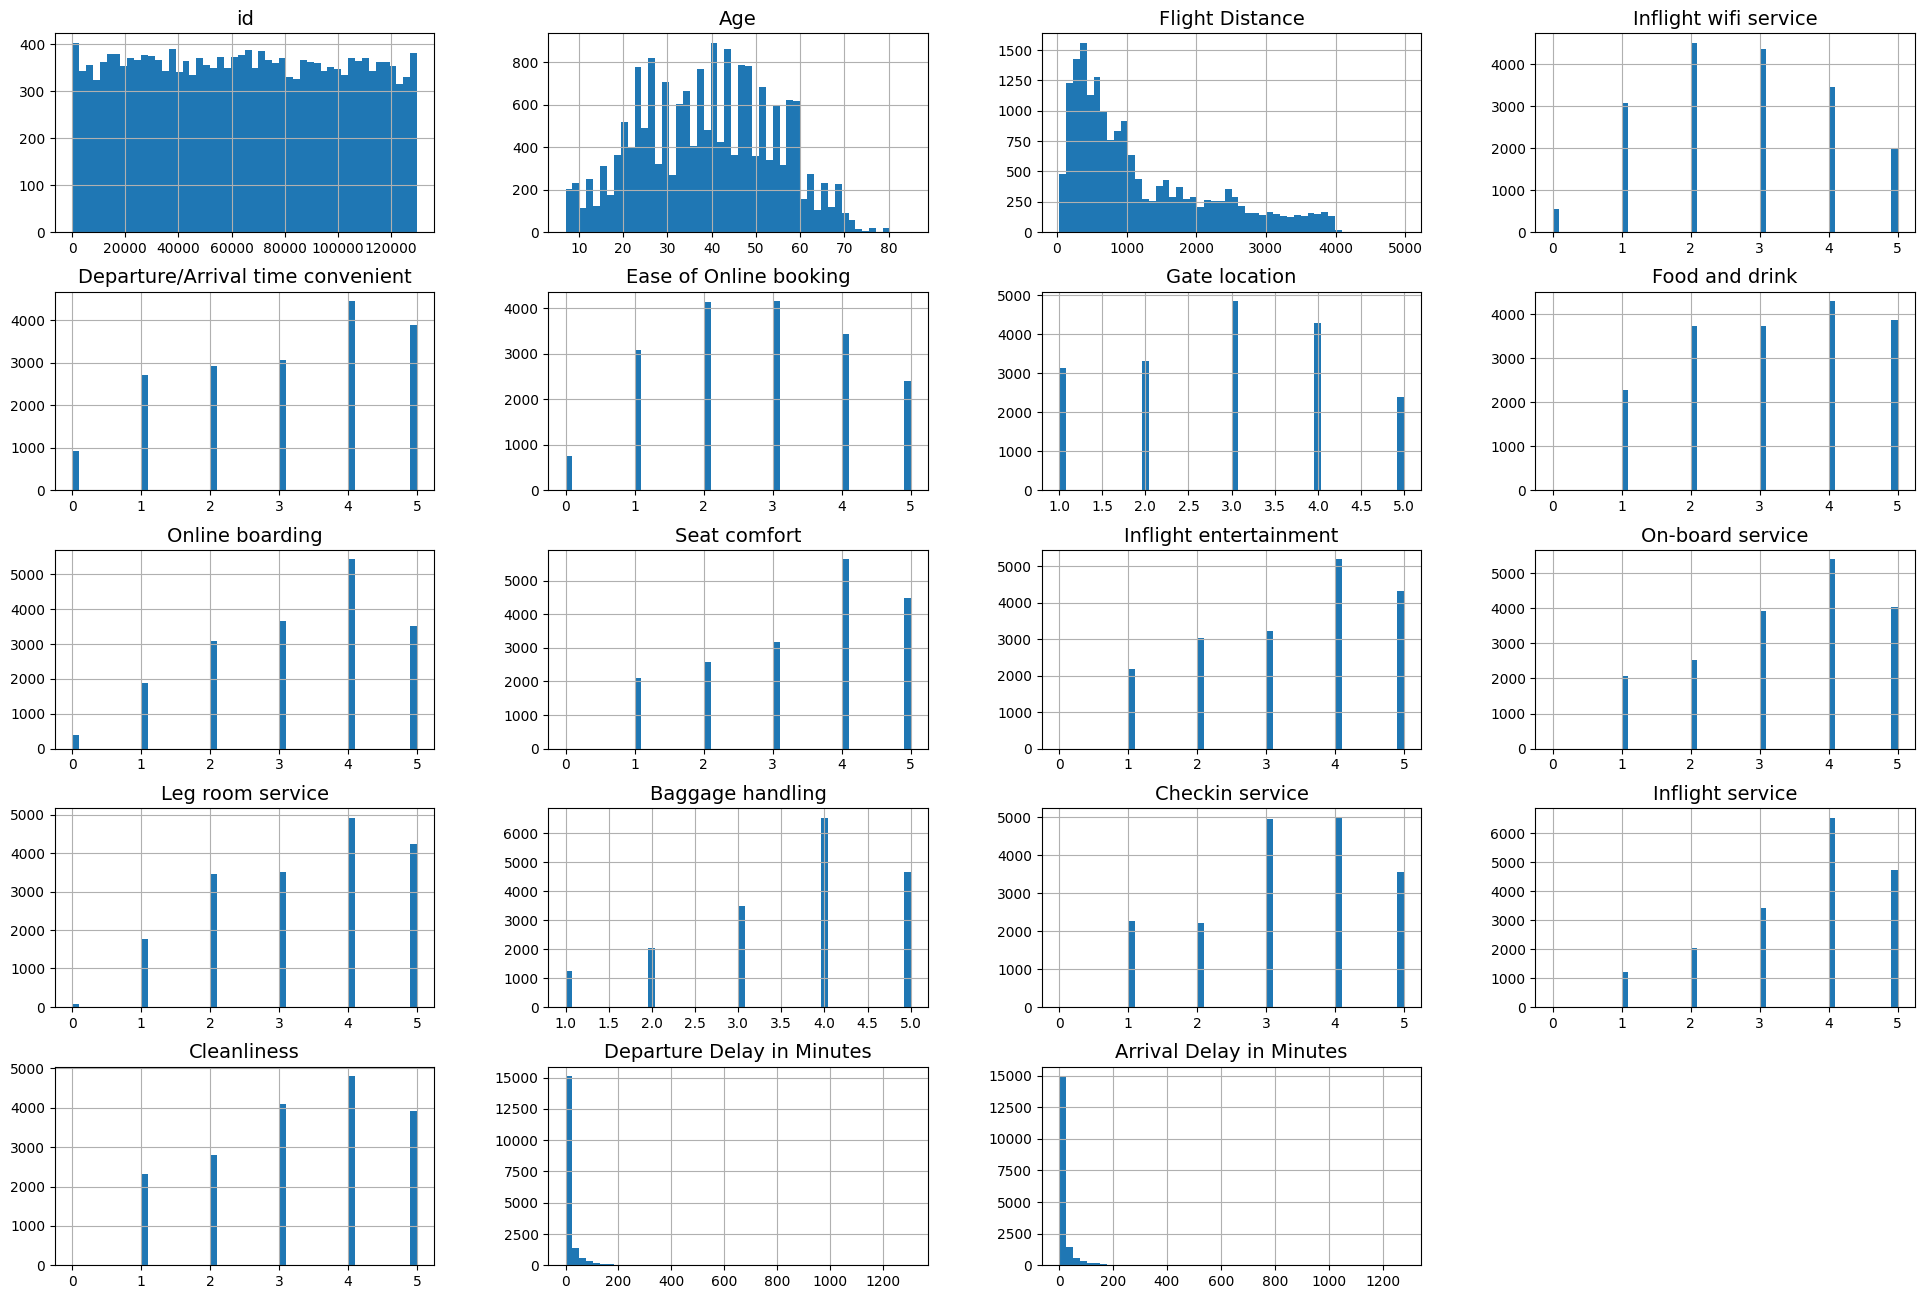

In [5]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

data.hist(bins=50, figsize=(24, 16))
plt.show()

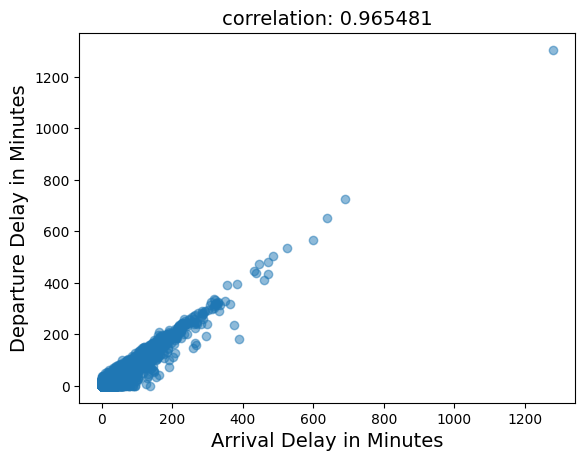

In [6]:
plt.scatter(data['Arrival Delay in Minutes'], data['Departure Delay in Minutes'], alpha = 0.5)
plt.title("correlation: 0.965481")
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Departure Delay in Minutes')

plt.show()

In [7]:
data = data[data['Customer Type'] != 'Loyal Custome']

In [8]:
columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

for column in columns:
    value_counts = data[column].value_counts()
    print(f"\n### {column} ###")
    print(value_counts)


### Gender ###
Female    9137
Male      8824
Name: Gender, dtype: int64

### Customer Type ###
Loyal Customer       14673
disloyal Customer     3288
Name: Customer Type, dtype: int64

### Type of Travel ###
Business travel    12400
Personal Travel     5561
Name: Type of Travel, dtype: int64

### Class ###
Business    8568
Eco         8099
Eco Plus    1294
Name: Class, dtype: int64

### satisfaction ###
neutral or dissatisfied    10104
satisfied                   7857
Name: satisfaction, dtype: int64


In [9]:
data.dropna(axis=0, inplace=True)
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460.0,3.0,4.0,3.0,...,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25.0,Business travel,Business,235.0,3.0,2.0,3.0,...,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26.0,Business travel,Business,1142.0,2.0,2.0,2.0,...,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,satisfied
3,24026,Female,Loyal Customer,25.0,Business travel,Business,562.0,2.0,5.0,5.0,...,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61.0,Business travel,Business,214.0,3.0,3.0,3.0,...,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,satisfied


In [10]:
data.drop('id', axis=1, inplace=True)
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460.0,3.0,4.0,3.0,1.0,...,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25.0,Business travel,Business,235.0,3.0,2.0,3.0,3.0,...,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26.0,Business travel,Business,1142.0,2.0,2.0,2.0,2.0,...,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,satisfied
3,Female,Loyal Customer,25.0,Business travel,Business,562.0,2.0,5.0,5.0,5.0,...,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61.0,Business travel,Business,214.0,3.0,3.0,3.0,3.0,...,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,satisfied


In [11]:
data.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [12]:
data2 = data

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

data2 = data

label_encoder = LabelEncoder()
data2['Gender'] = label_encoder.fit_transform(data2['Gender'])
data2['Customer Type'] = label_encoder.fit_transform(data2['Customer Type'])
data2['Type of Travel'] = label_encoder.fit_transform(data2['Type of Travel'])

target_columns = ['Class']
for column in target_columns:
    cat_encoder = OneHotEncoder(sparse_output=False)
    temp = data2[[column]]
    temp_encoded = cat_encoder.fit_transform(temp)
    temp_encoded_df = pd.DataFrame(temp_encoded, columns=cat_encoder.get_feature_names_out([column]))
    data2 = data2.drop(column, axis=1)
    data2 = pd.concat([data2, temp_encoded_df], axis=1)

data2.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,1,0,13.0,1,460.0,3.0,4.0,3.0,1.0,5.0,...,4.0,4.0,5.0,5.0,25.0,18.0,neutral or dissatisfied,0.0,0.0,1.0
1,1,1,25.0,0,235.0,3.0,2.0,3.0,3.0,1.0,...,3.0,1.0,4.0,1.0,1.0,6.0,neutral or dissatisfied,1.0,0.0,0.0
2,0,0,26.0,0,1142.0,2.0,2.0,2.0,2.0,5.0,...,4.0,4.0,4.0,5.0,0.0,0.0,satisfied,1.0,0.0,0.0
3,0,0,25.0,0,562.0,2.0,5.0,5.0,5.0,2.0,...,3.0,1.0,4.0,2.0,11.0,9.0,neutral or dissatisfied,1.0,0.0,0.0
4,1,0,61.0,0,214.0,3.0,3.0,3.0,3.0,4.0,...,4.0,3.0,3.0,3.0,0.0,0.0,satisfied,1.0,0.0,0.0


In [14]:
print(data2.columns)
print(data2.shape)

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Class_Business', 'Class_Eco', 'Class_Eco Plus'],
      dtype='object')
(17917, 25)


In [15]:
data2.describe()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus
count,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,...,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000
mean,0.491321,0.183345,39.094715,0.309427,1193.104649,2.733549,3.057208,2.759837,2.972875,3.207791,...,3.343249,3.628007,3.297874,3.641346,3.289390,14.682815,15.091701,0.477089,0.450857,0.072054
std,0.499939,0.386960,15.068631,0.462270,1001.339568,1.331392,1.531218,1.400483,1.284858,1.335482,...,1.312455,1.182821,1.267328,1.178652,1.316648,37.257508,37.754968,0.499489,0.497593,0.258585
min,0.000000,0.000000,7.000000,0.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,39.000000,0.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,51.000000,1.000000,1746.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,85.000000,1.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000,1.000000,1.000000,1.000000


In [16]:
data2.drop('Arrival Delay in Minutes', axis=1, inplace=True)

rows = ['Flight Distance', 'Departure Delay in Minutes']

for row in rows:
    data2['log_' + row] = np.log(data2[row] + 1)
    data2.drop(row, axis=1, inplace=True)

data2.describe()

,Gender,Customer Type,Age,Type of Travel,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Class_Business,Class_Eco,Class_Eco Plus,log_Flight Distance,log_Departure Delay in Minutes
count,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,...,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000
mean,0.491321,0.183345,39.094715,0.309427,2.733549,3.057208,2.759837,2.972875,3.207791,3.246916,...,3.343249,3.628007,3.297874,3.641346,3.289390,0.477089,0.450857,0.072054,6.706942,1.240706
std,0.499939,0.386960,15.068631,0.462270,1.331392,1.531218,1.400483,1.284858,1.335482,1.347511,...,1.312455,1.182821,1.267328,1.178652,1.316648,0.499489,0.497593,0.258585,0.917818,1.618518
min,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.465736,0.000000
25%,0.000000,0.000000,27.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,6.028279,0.000000
50%,0.000000,0.000000,39.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,6.736967,0.000000
75%,1.000000,0.000000,51.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,5.000000,4.000000,5.000000,4.000000,1.000000,1.000000,0.000000,7.465655,2.564949
max,1.000000,1.000000,85.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,8.513988,7.174724


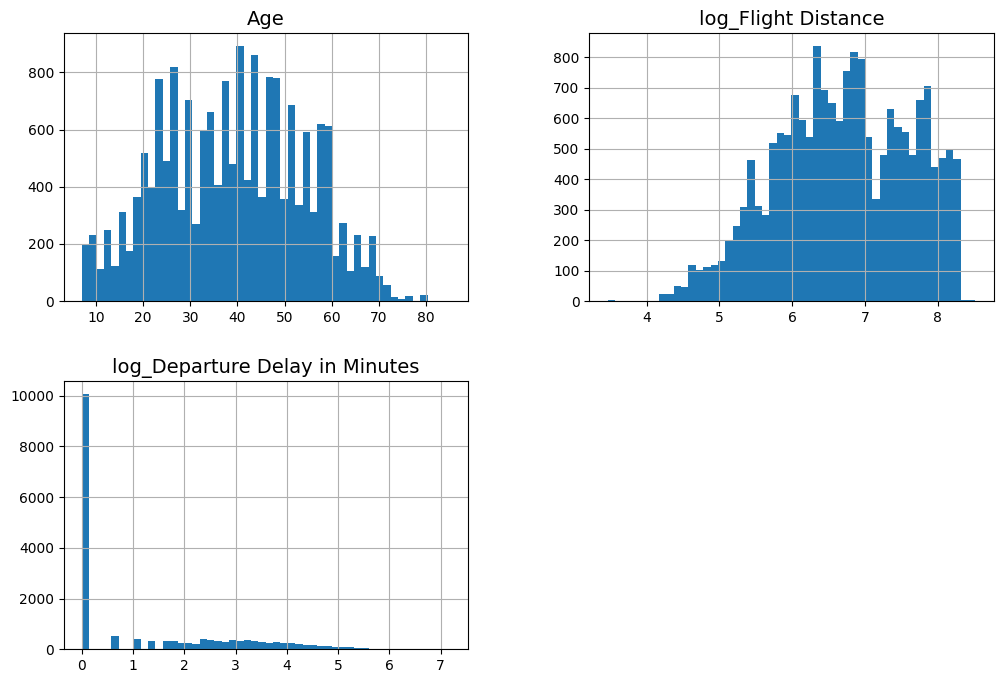

In [17]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

rows = ['Age', 'log_Flight Distance', 'log_Departure Delay in Minutes']

data2[rows].hist(bins=50, figsize=(12, 8))
plt.show()

In [18]:
data2['Departure Delay Category'] = np.where(data2['log_Departure Delay in Minutes'] == 0, 0, 1)
data2.drop('log_Departure Delay in Minutes', axis=1, inplace=True)
data2['Departure Delay Category'].value_counts()

0    10061
1     7856
Name: Departure Delay Category, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

data2[['Age', 'log_Flight Distance']] = sc.fit_transform(data2[['Age', 'log_Flight Distance']])
data2.describe()

,Gender,Customer Type,Age,Type of Travel,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Class_Business,Class_Eco,Class_Eco Plus,log_Flight Distance,Departure Delay Category
count,17917.000000,17917.000000,1.791700e+04,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,...,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,1.791700e+04,17917.000000
mean,0.491321,0.183345,-2.538078e-17,0.309427,2.733549,3.057208,2.759837,2.972875,3.207791,3.246916,...,3.343249,3.628007,3.297874,3.641346,3.289390,0.477089,0.450857,0.072054,9.097422e-16,0.438466
std,0.499939,0.386960,1.000028e+00,0.462270,1.331392,1.531218,1.400483,1.284858,1.335482,1.347511,...,1.312455,1.182821,1.267328,1.178652,1.316648,0.499489,0.497593,0.258585,1.000028e+00,0.496213
min,0.000000,0.000000,-2.129962e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.531524e+00,0.000000
25%,0.000000,0.000000,-8.026643e-01,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,-7.394517e-01,0.000000
50%,0.000000,0.000000,-6.285718e-03,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,3.271466e-02,0.000000
75%,1.000000,0.000000,7.900928e-01,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,5.000000,4.000000,5.000000,4.000000,1.000000,1.000000,0.000000,8.266723e-01,1.000000
max,1.000000,1.000000,3.046499e+00,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.968905e+00,1.000000


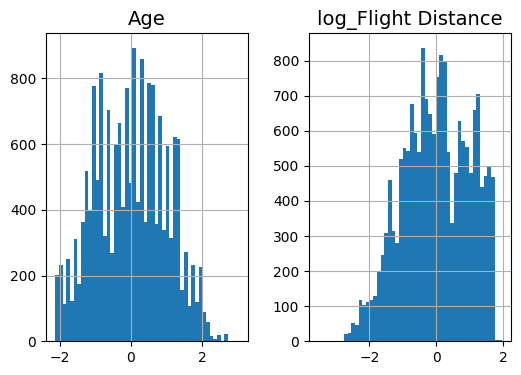

In [20]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

rows = ['Age', 'log_Flight Distance']

data2[rows].hist(bins=50, figsize=(6, 4))
plt.show()

In [21]:
data2['satisfaction'] = label_encoder.fit_transform(data2['satisfaction'])

In [22]:
print(data2.columns)
print(data2.shape)

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction',
       'Class_Business', 'Class_Eco', 'Class_Eco Plus', 'log_Flight Distance',
       'Departure Delay Category'],
      dtype='object')
(17917, 24)


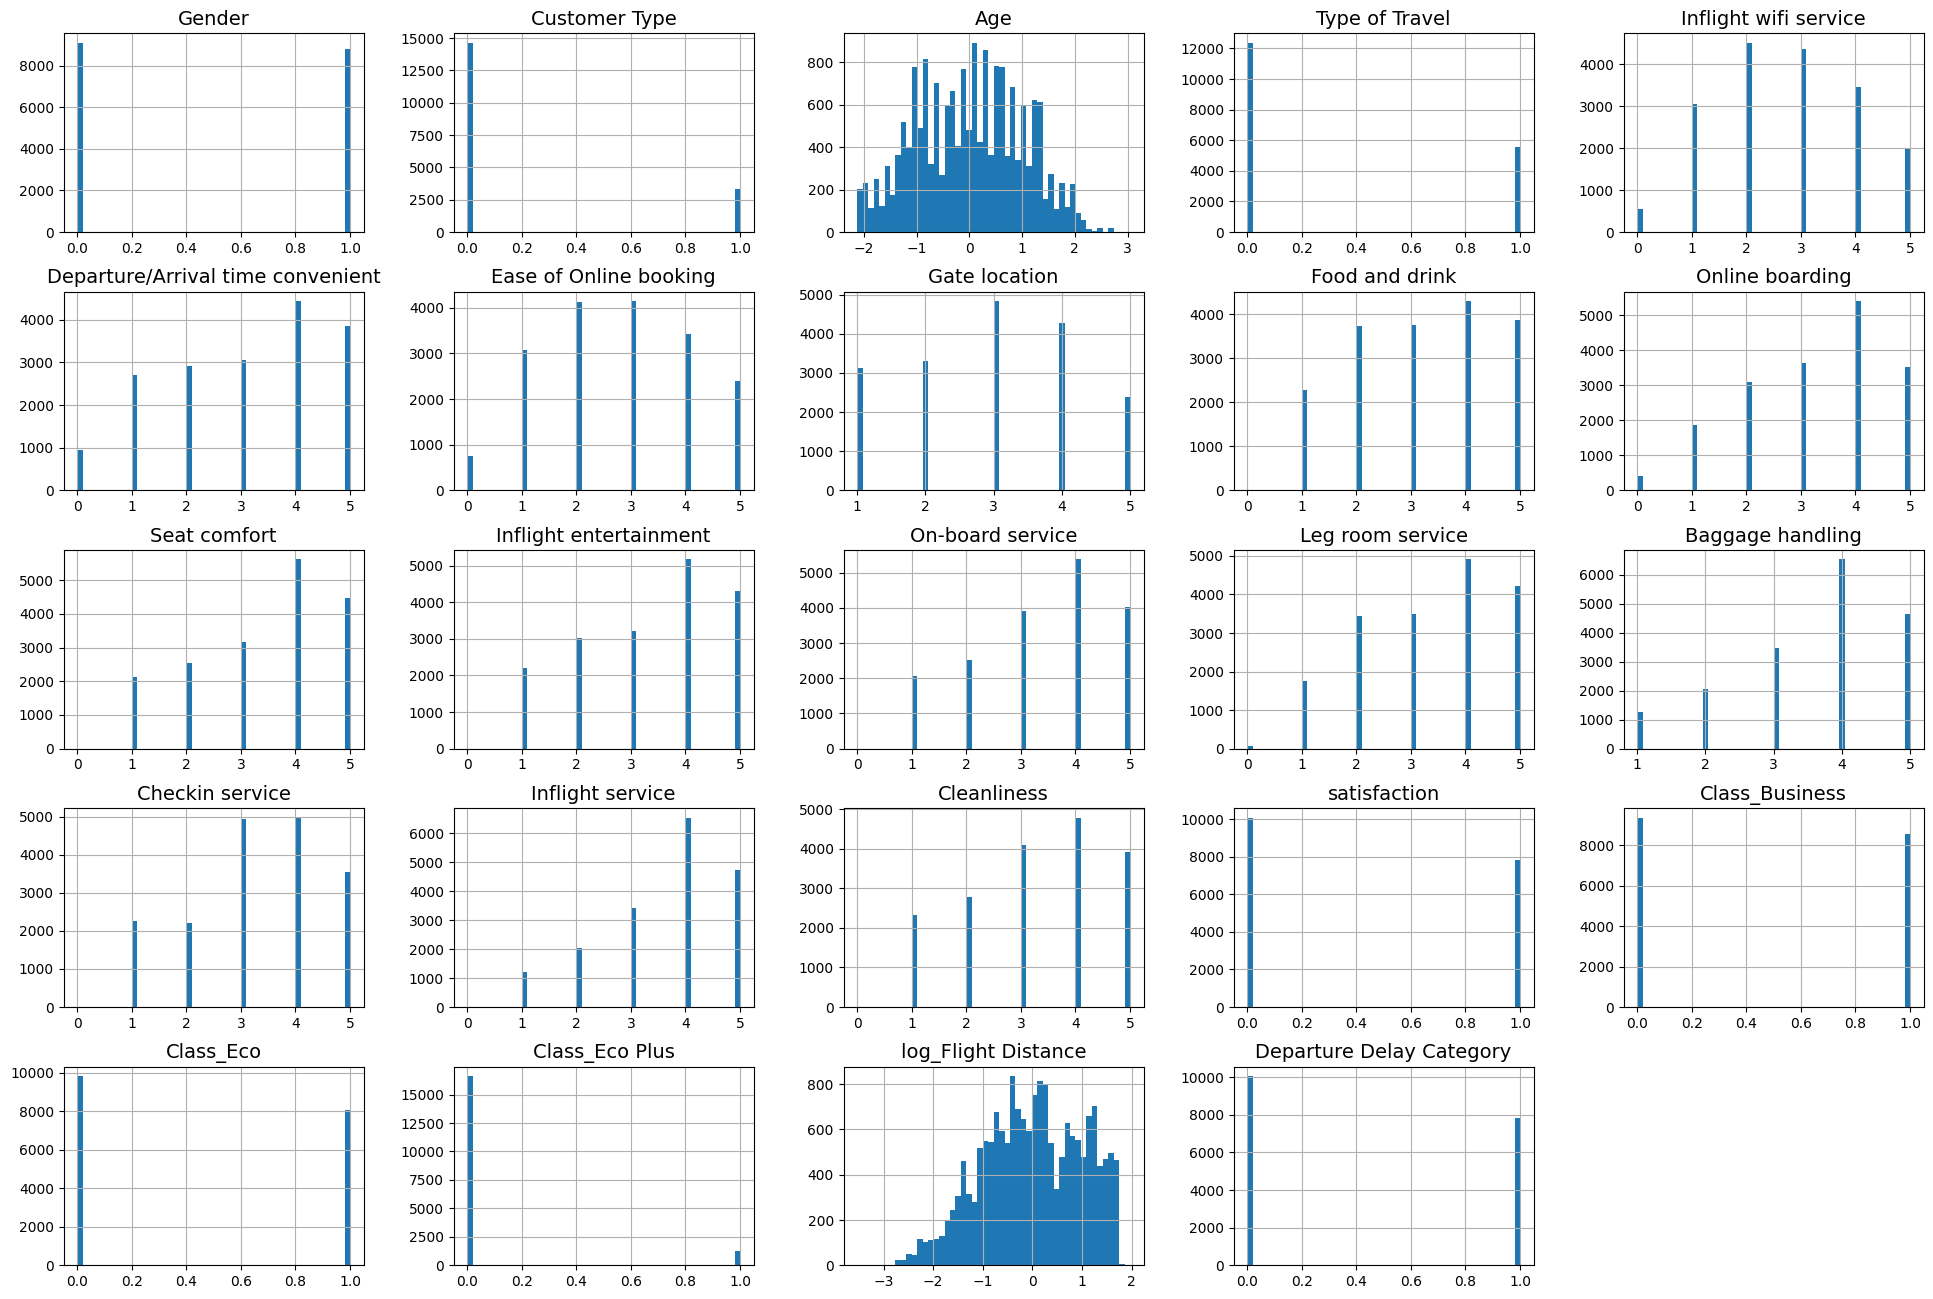

In [23]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

data2.hist(bins=50, figsize=(24, 16))
plt.show()

# data2는 최종 전처리 데이터

In [24]:
train_set = data2
train_set.head()

,Gender,Customer Type,Age,Type of Travel,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Class_Business,Class_Eco,Class_Eco Plus,log_Flight Distance,Departure Delay Category
0,1,0,-1.731773,1,3.0,4.0,3.0,1.0,5.0,3.0,...,4.0,4.0,5.0,5.0,0,0.0,0.0,1.0,-0.624916,1
1,1,1,-0.935394,0,3.0,2.0,3.0,3.0,1.0,3.0,...,3.0,1.0,4.0,1.0,0,1.0,0.0,0.0,-1.354456,1
2,0,0,-0.869029,0,2.0,2.0,2.0,2.0,5.0,5.0,...,4.0,4.0,4.0,5.0,1,1.0,0.0,0.0,0.364429,0
3,0,0,-0.935394,0,2.0,5.0,5.0,5.0,2.0,2.0,...,3.0,1.0,4.0,2.0,0,1.0,0.0,0.0,-0.407131,1
4,1,0,1.453742,0,3.0,3.0,3.0,3.0,4.0,5.0,...,4.0,3.0,3.0,3.0,1,1.0,0.0,0.0,-1.455998,0


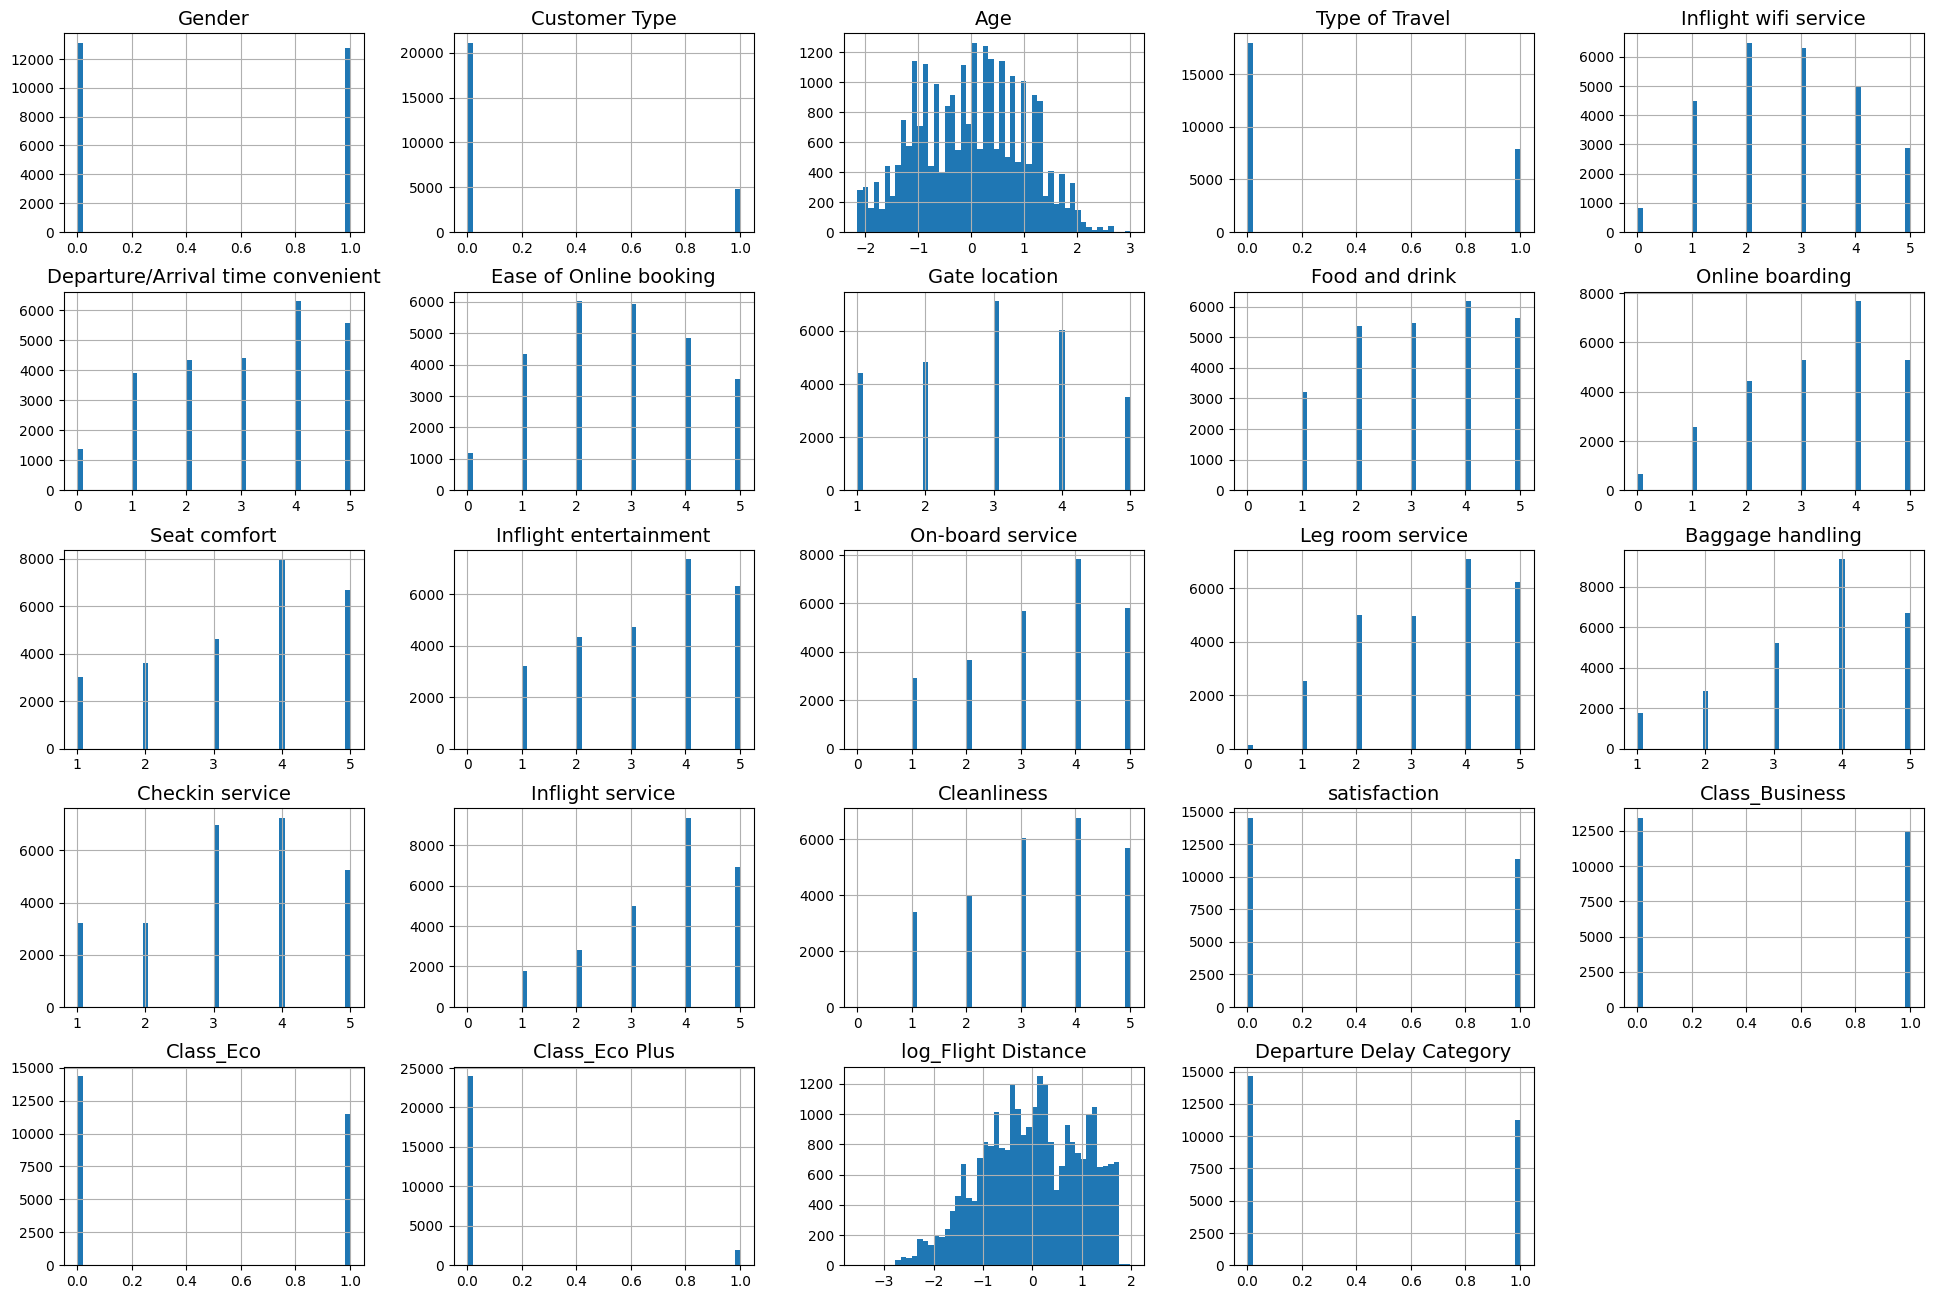

In [25]:
test_set = pd.read_csv("./test.csv", index_col=0)
test_set = test_set[test_set['Customer Type'] != 'Loyal Custome']
test_set.dropna(axis=0, inplace=True)
test_set.drop('id', axis=1, inplace=True)


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
test_set['Gender'] = label_encoder.fit_transform(test_set['Gender'])
test_set['Customer Type'] = label_encoder.fit_transform(test_set['Customer Type'])
test_set['Type of Travel'] = label_encoder.fit_transform(test_set['Type of Travel'])
target_columns = ['Class']
for column in target_columns:
    cat_encoder = OneHotEncoder(sparse_output=False)
    temp = test_set[[column]]
    temp_encoded = cat_encoder.fit_transform(temp)
    temp_encoded_df = pd.DataFrame(temp_encoded, columns=cat_encoder.get_feature_names_out([column]))
    test_set = test_set.drop(column, axis=1)
    test_set = pd.concat([test_set, temp_encoded_df], axis=1)


test_set.drop('Arrival Delay in Minutes', axis=1, inplace=True)
rows = ['Flight Distance', 'Departure Delay in Minutes']
for row in rows:
    test_set['log_' + row] = np.log(test_set[row] + 1)
    test_set.drop(row, axis=1, inplace=True)


test_set['Departure Delay Category'] = np.where(test_set['log_Departure Delay in Minutes'] == 0, 0, 1)
test_set.drop('log_Departure Delay in Minutes', axis=1, inplace=True)
test_set['Departure Delay Category'].value_counts()


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
test_set[['Age', 'log_Flight Distance']] = sc.fit_transform(test_set[['Age', 'log_Flight Distance']])
test_set['satisfaction'] = label_encoder.fit_transform(test_set['satisfaction'])

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

test_set.hist(bins=50, figsize=(24, 16))
plt.show()

# 여기부터 모델 사용
## train_set, test_set

In [57]:
def train_and_evaluate(models, param_grids, X_train, y_train, X_test, y_test):
    for model_name, model in models:
        grid_search = GridSearchCV(model, param_grids[model_name], scoring='accuracy', cv=5)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        precision_curve, recall_curve, _ = precision_recall_curve(y_test, best_model.predict_proba(X_test)[:, 1])
        pr_auc = auc(recall_curve, precision_curve)

        plt.figure(figsize=(18, 8))

        plt.subplot(2, 2, 1)
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False)
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')

        plt.subplot(2, 2, 2)
        plt.step(recall_curve, precision_curve, where='post', color='b')
        plt.fill_between(recall_curve, precision_curve, step='post', alpha=0.2, color='b')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve - {model_name}')

        plt.subplot(2, 2, (3, 4))
        plt.text(0.1, 0.7, f"Best Params: {grid_search.best_params_}", fontsize=9)
        plt.text(0.1, 0.6, f"Accuracy: {accuracy:.4f}", fontsize=9)
        plt.text(0.1, 0.5, f"Precision: {precision:.4f}", fontsize=9)
        plt.text(0.1, 0.4, f"Recall: {recall:.4f}", fontsize=9)
        plt.text(0.1, 0.3, f"F1 Score: {f1:.4f}", fontsize=9)
        plt.text(0.1, 0.2, f"PR AUC: {pr_auc:.4f}", fontsize=9)
        plt.axis('off')

        plt.tight_layout()
        plt.show()

In [44]:
X_train_0 = train_set.drop('satisfaction', axis=1)
y_train_0 = train_set['satisfaction']
X_test_0 = test_set.drop('satisfaction', axis=1)
y_test_0 = test_set['satisfaction']

y_train_1 = y_train_0.copy()
num_samples = int(0.01 * len(y_train_0))
random_indices = np.random.choice(y_train_0.index, num_samples, replace=False)
y_train_1.loc[random_indices] = 1 - y_train_0.loc[random_indices]

y_train_3 = y_train_0.copy()
num_samples = int(0.03 * len(y_train_0))
random_indices = np.random.choice(y_train_0.index, num_samples, replace=False)
y_train_3.loc[random_indices] = 1 - y_train_0.loc[random_indices]

y_train_5 = y_train_0.copy()
num_samples = int(0.05 * len(y_train_0))
random_indices = np.random.choice(y_train_0.index, num_samples, replace=False)
y_train_5.loc[random_indices] = 1 - y_train_0.loc[random_indices]

y_train_10 = y_train_0.copy()
num_samples = int(0.10 * len(y_train_0))
random_indices = np.random.choice(y_train_0.index, num_samples, replace=False)
y_train_10.loc[random_indices] = 1 - y_train_0.loc[random_indices]


### KNN (Best Params: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}) ###
Accuracy: 0.9297
Precision: 0.9383
Recall: 0.8989
F1 Score: 0.9182
PR AUC: 0.9756


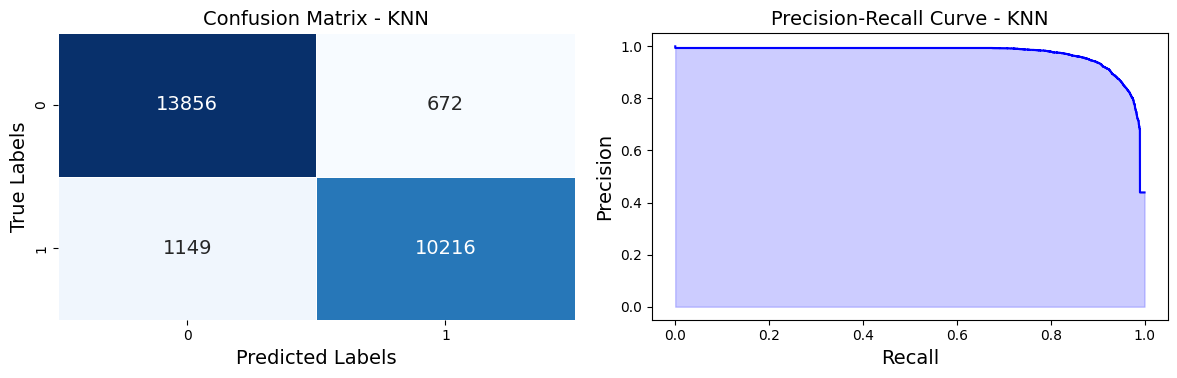


### SVM (Best Params: {'C': 1, 'gamma': 'auto'}) ###
Accuracy: 0.9460
Precision: 0.9485
Recall: 0.9273
F1 Score: 0.9378
PR AUC: 0.9833


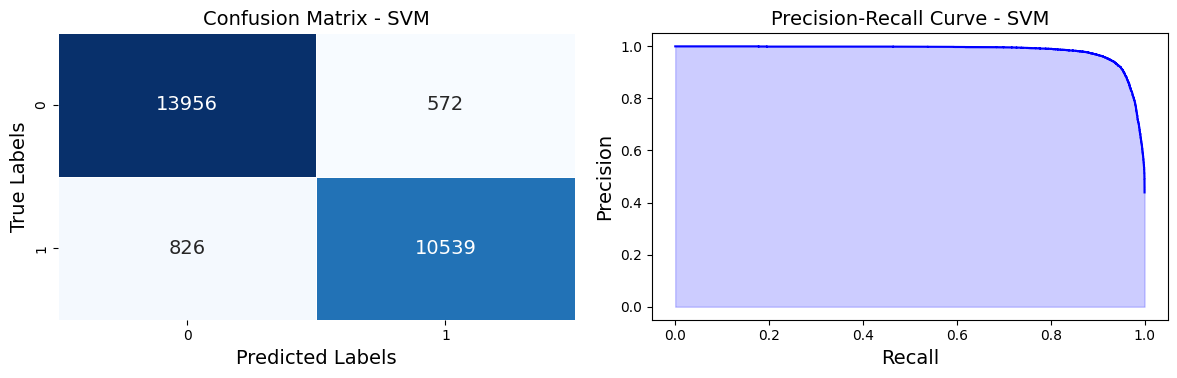


### Decision Tree (Best Params: {'max_depth': 10, 'min_samples_split': 100}) ###
Accuracy: 0.9394
Precision: 0.9429
Recall: 0.9176
F1 Score: 0.9301
PR AUC: 0.9755


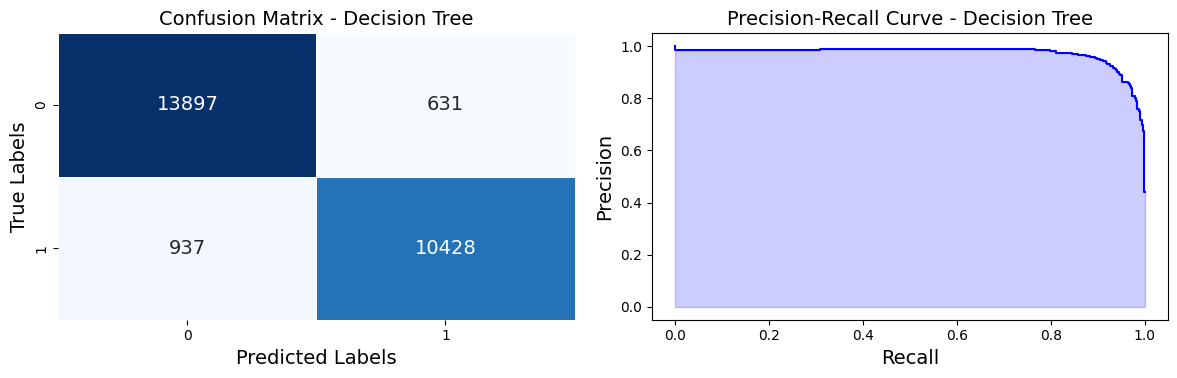

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, auc

models = [
    ('KNN', KNeighborsClassifier(n_jobs=1)),
    ('SVM', SVC(probability=True)),
    ('Decision Tree', DecisionTreeClassifier())
]

param_grids = {
    'KNN': {
        'n_neighbors': [5, 10, 20, 50, 100],
        'p': [1, 2],
    },
    'SVM': {
        'C': [0.1, 1],
        'gamma': ['scale', 'auto'],
    },
    'Decision Tree': {
        'max_depth': [3, 5, 10, 15],
        'min_samples_split': [10, 30, 50, 100, 300, 500, 1000],
    }
}

train_and_evaluate(models, param_grids, X_train_0, y_train_0, X_test_0, y_test_0)

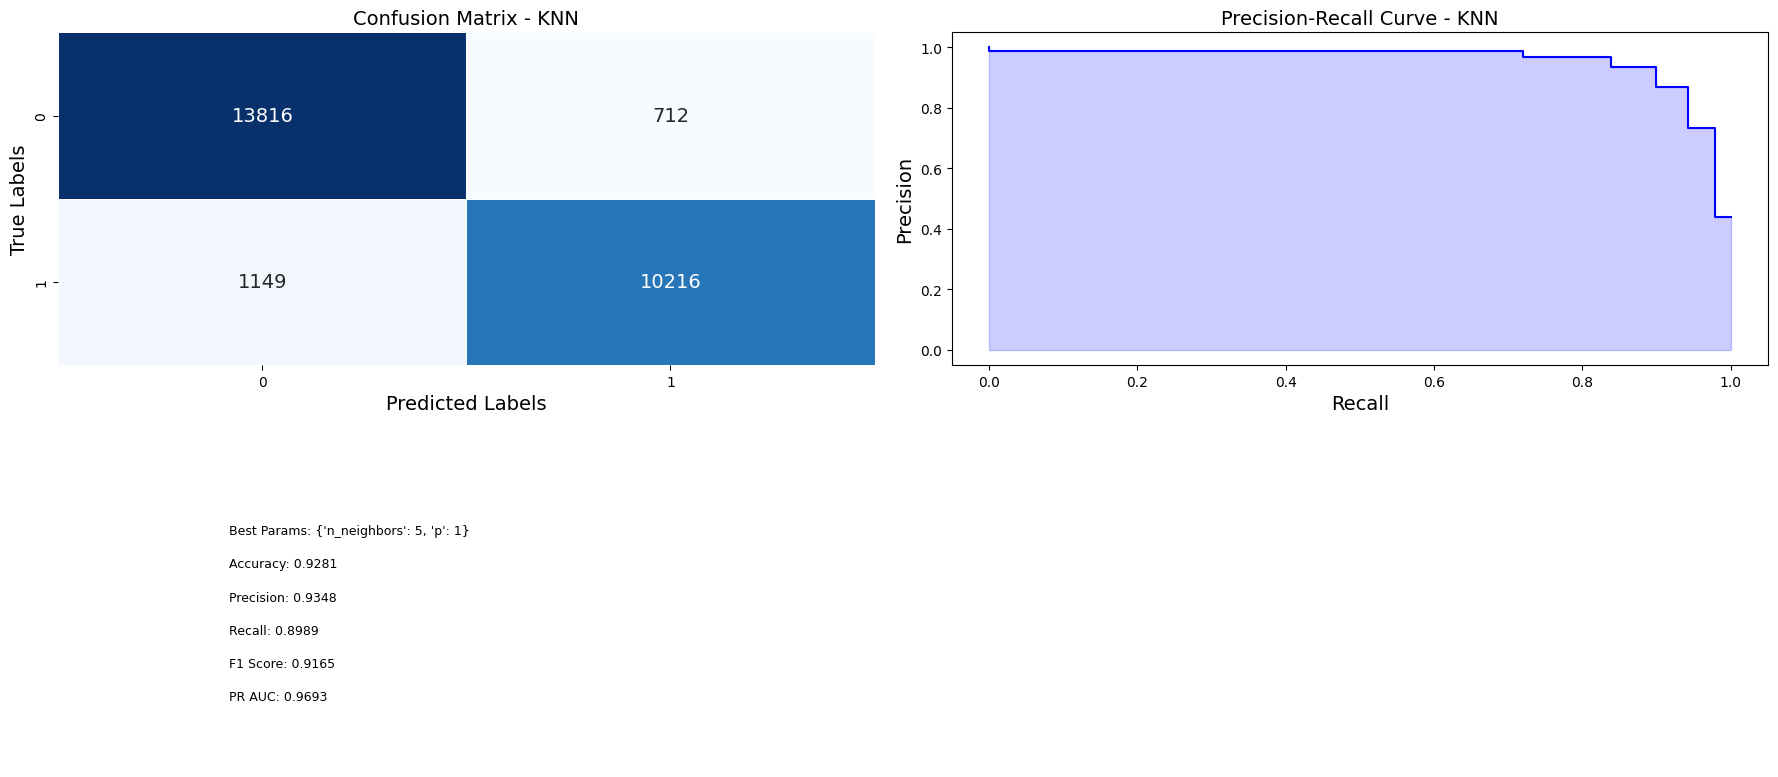

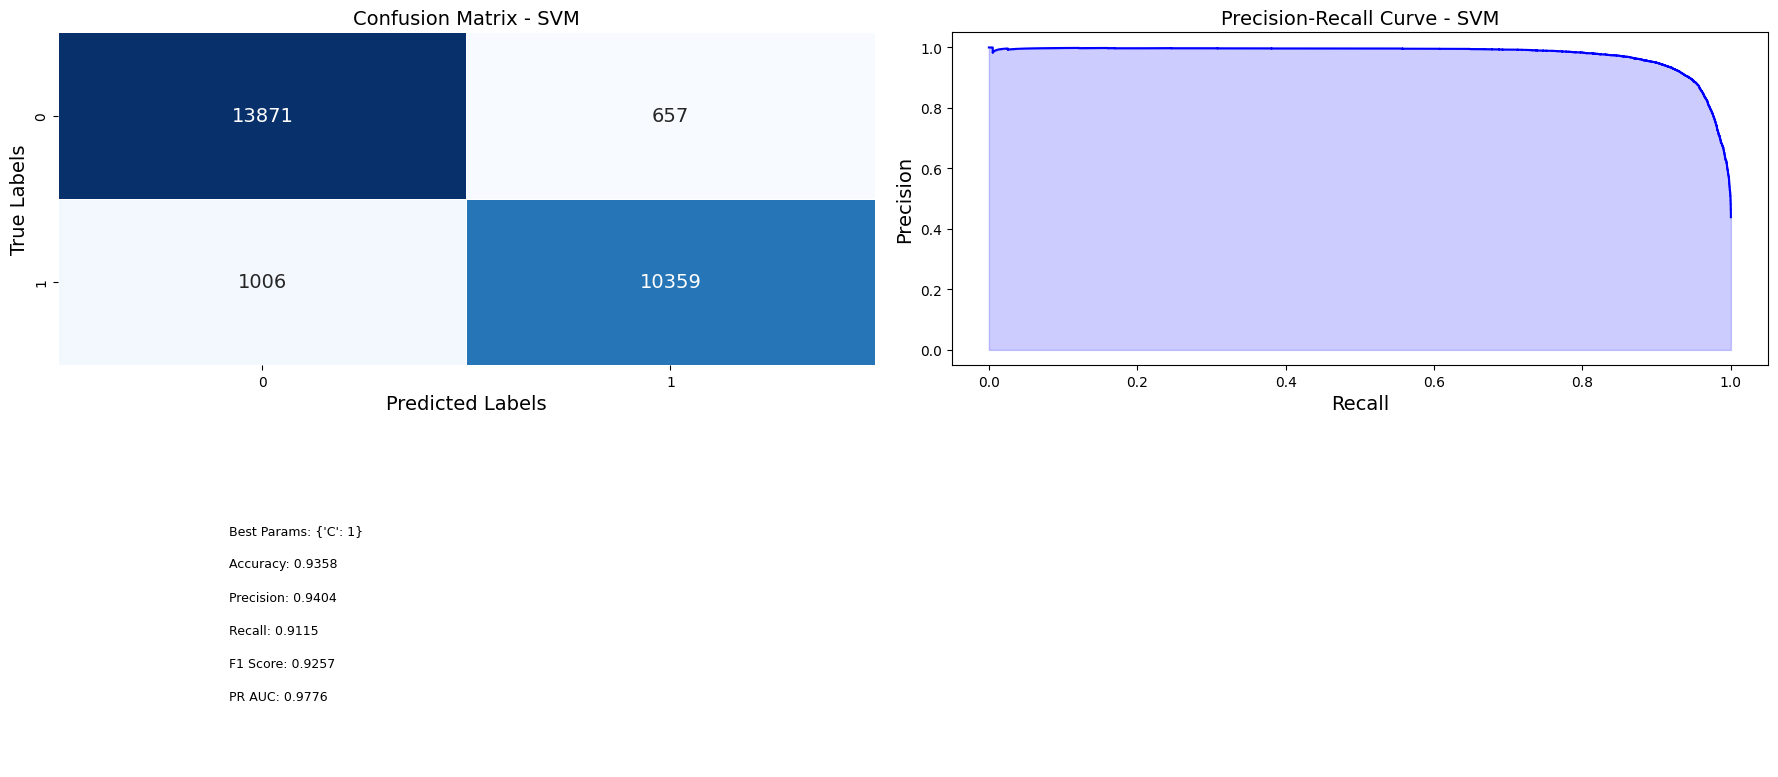

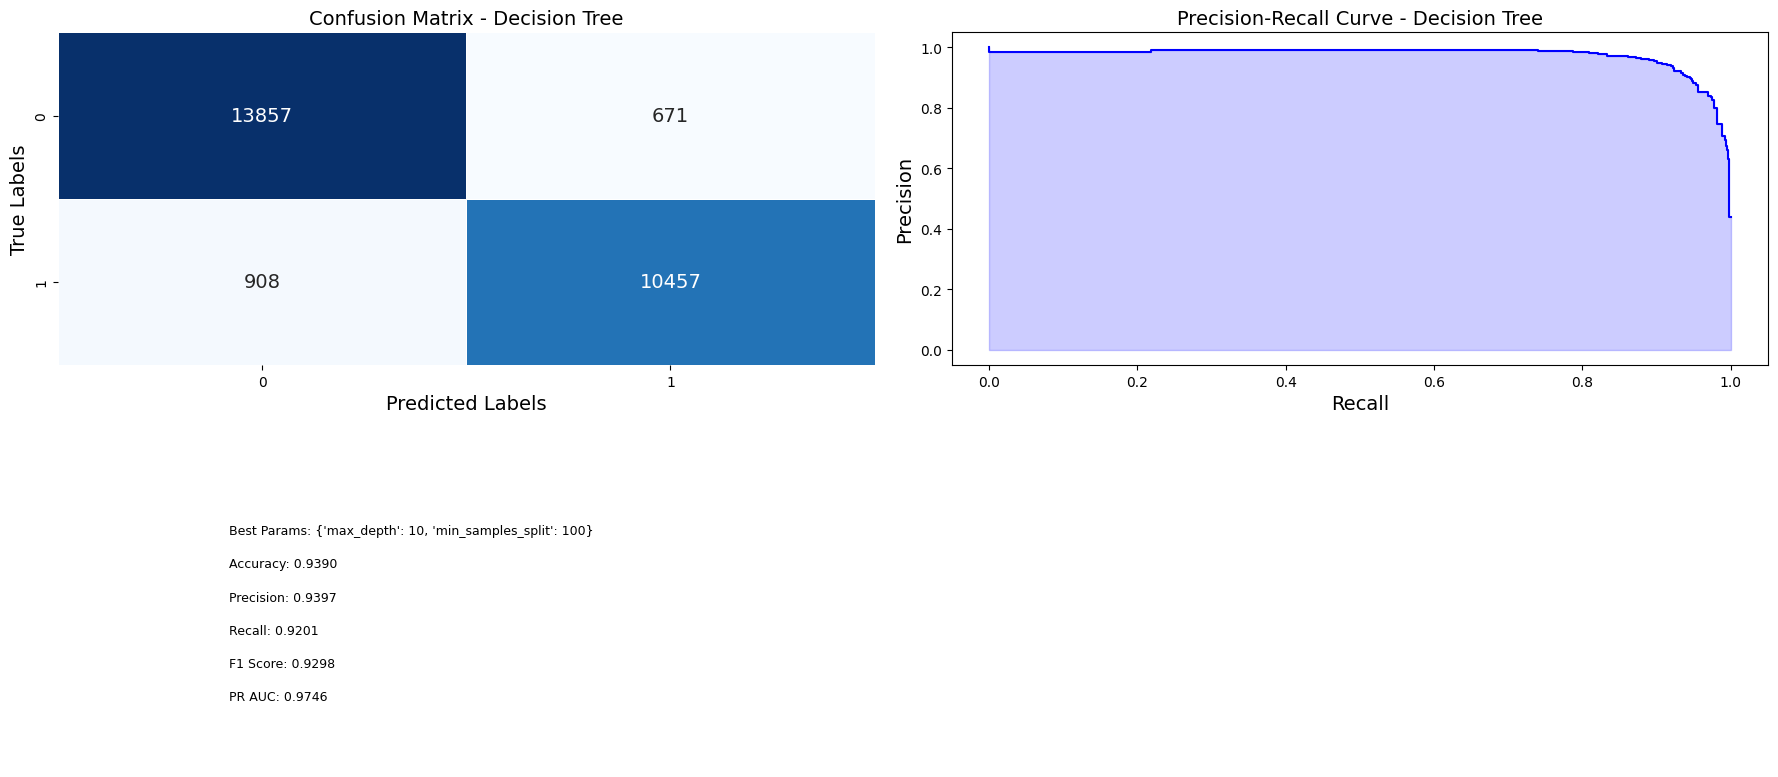

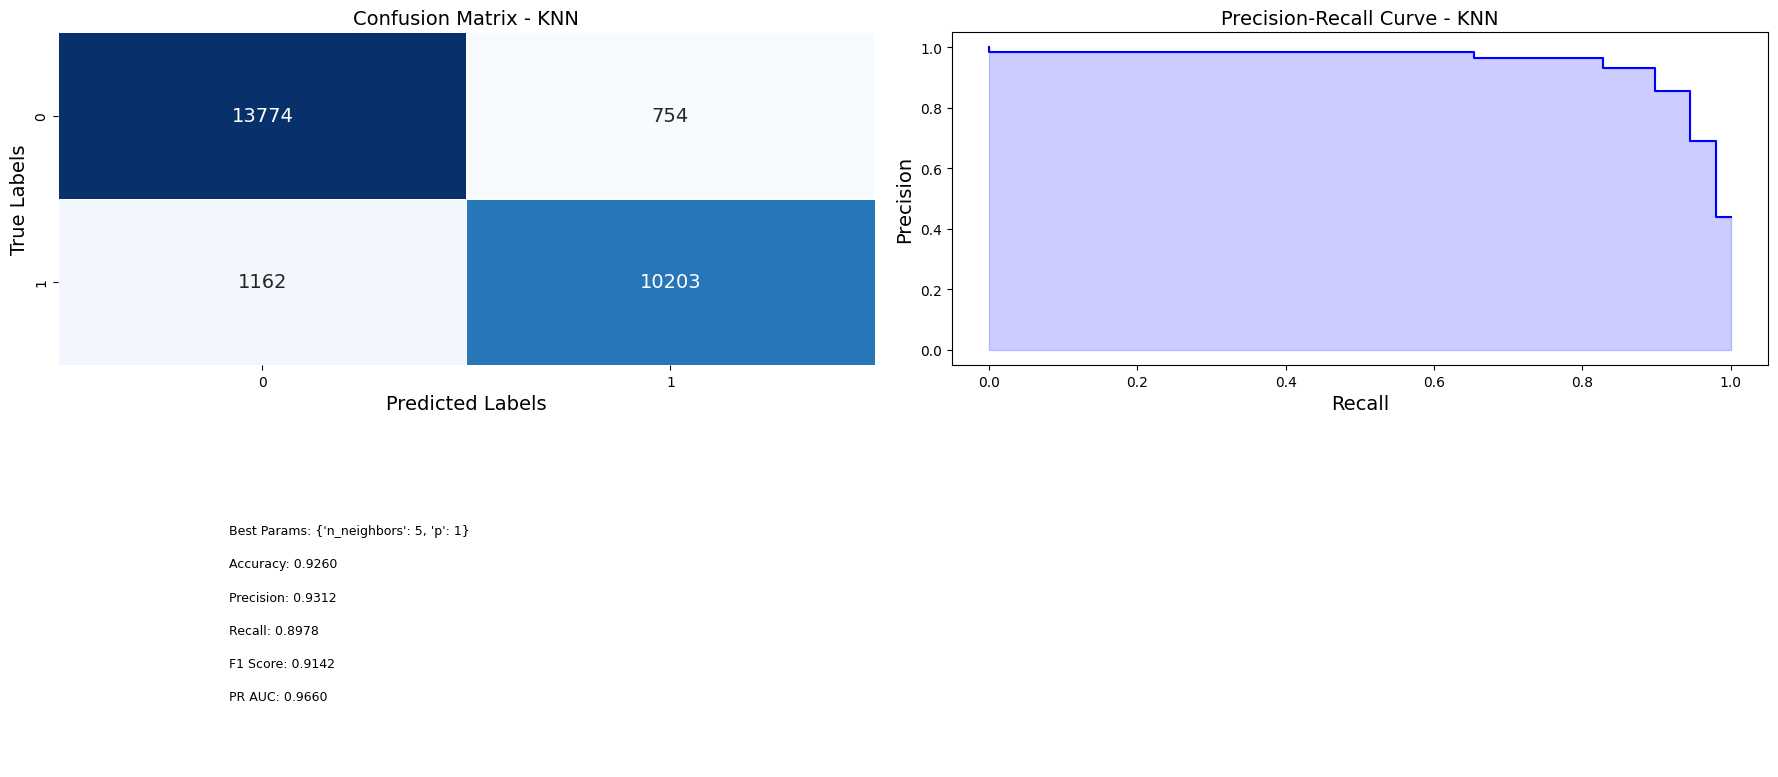

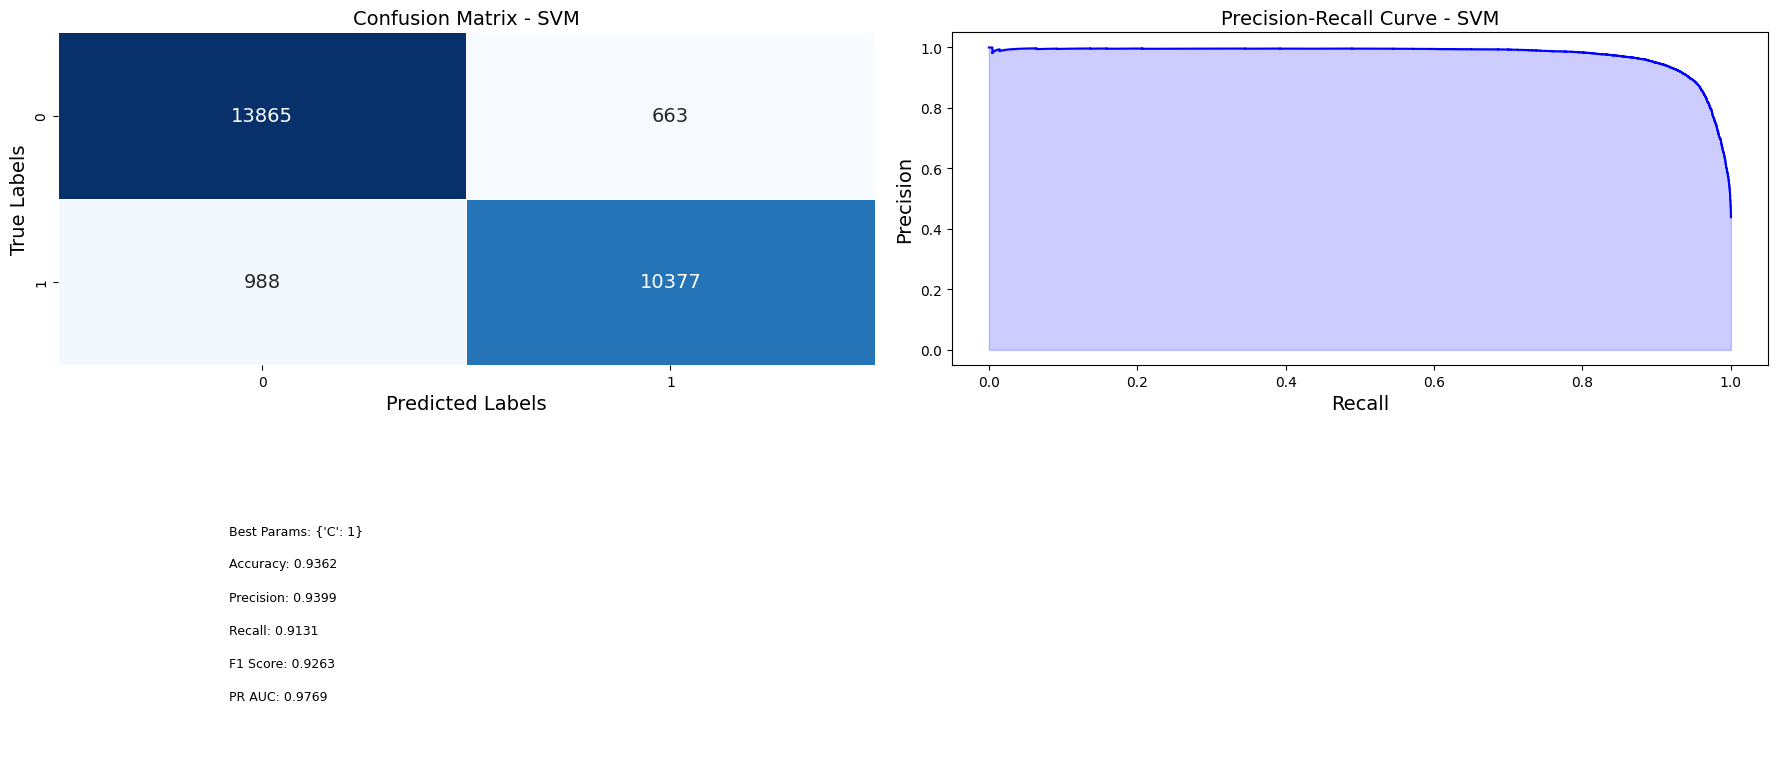

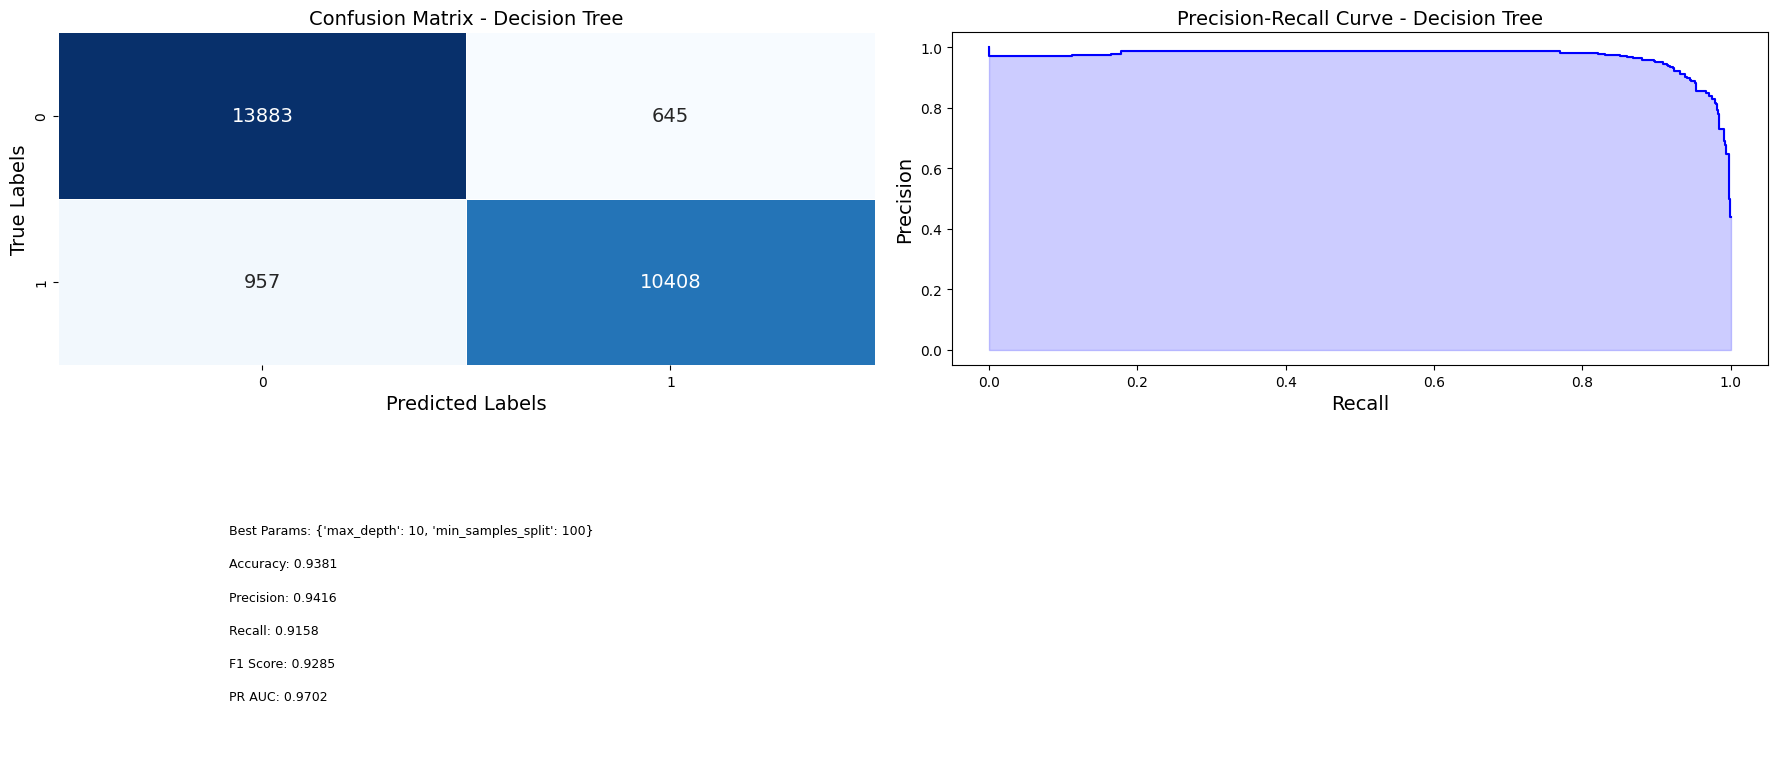

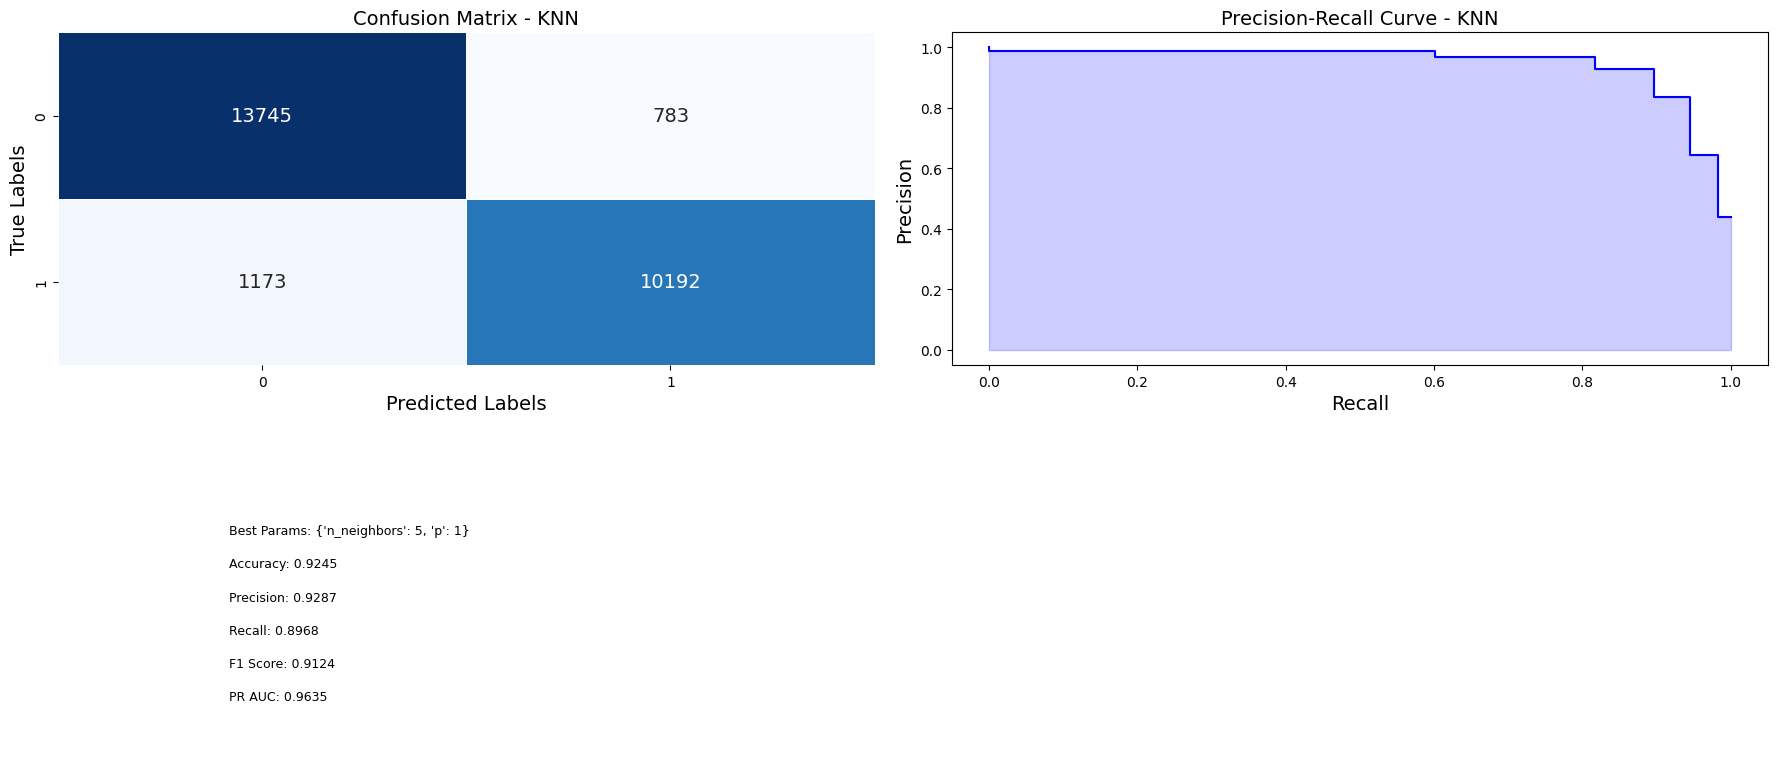

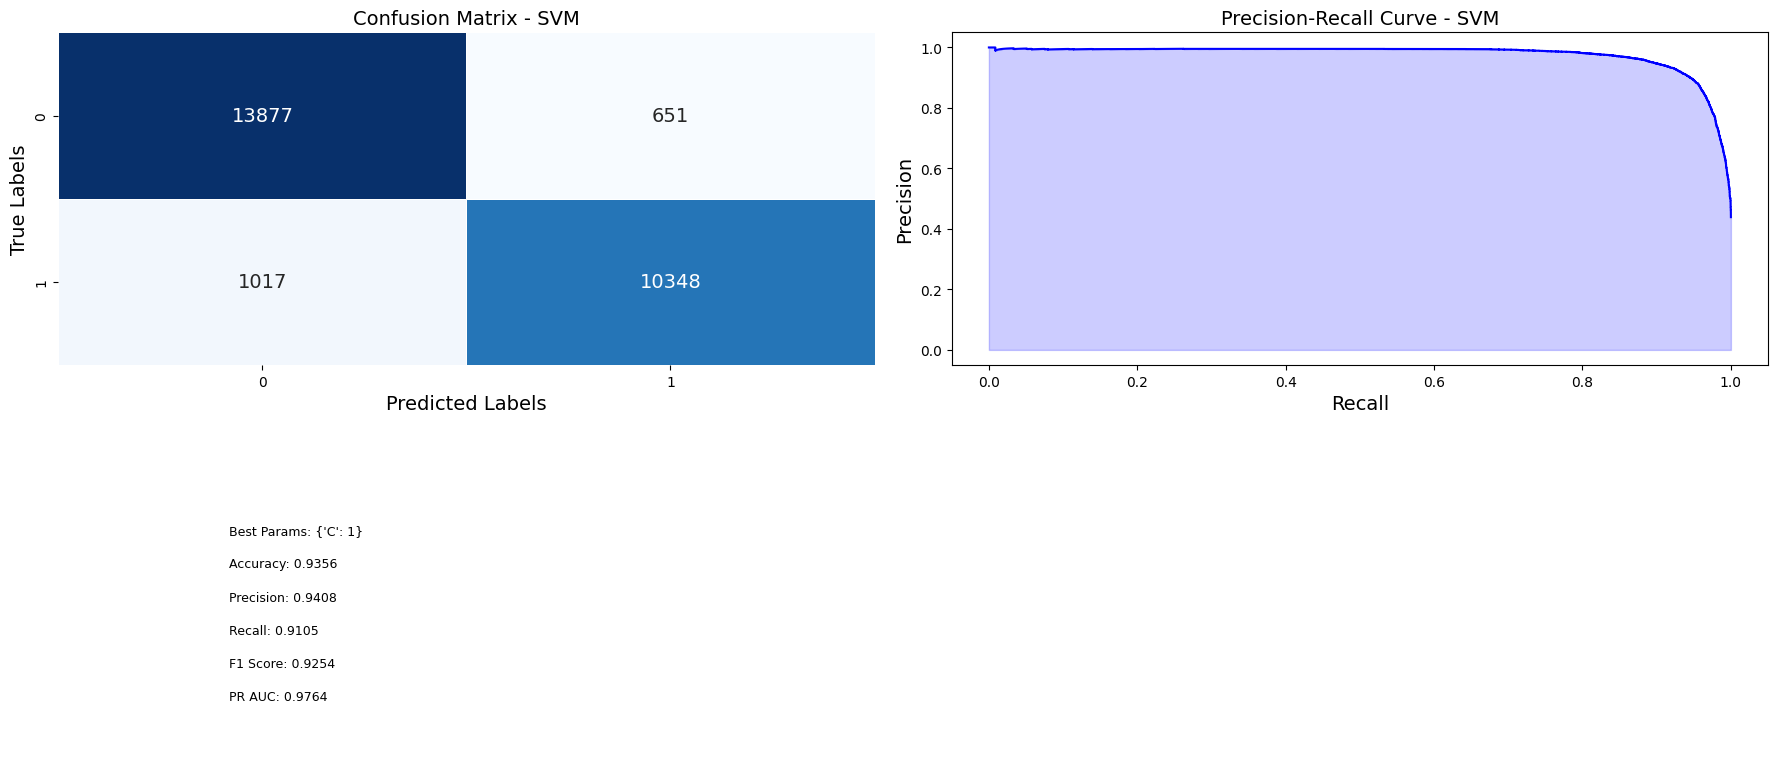

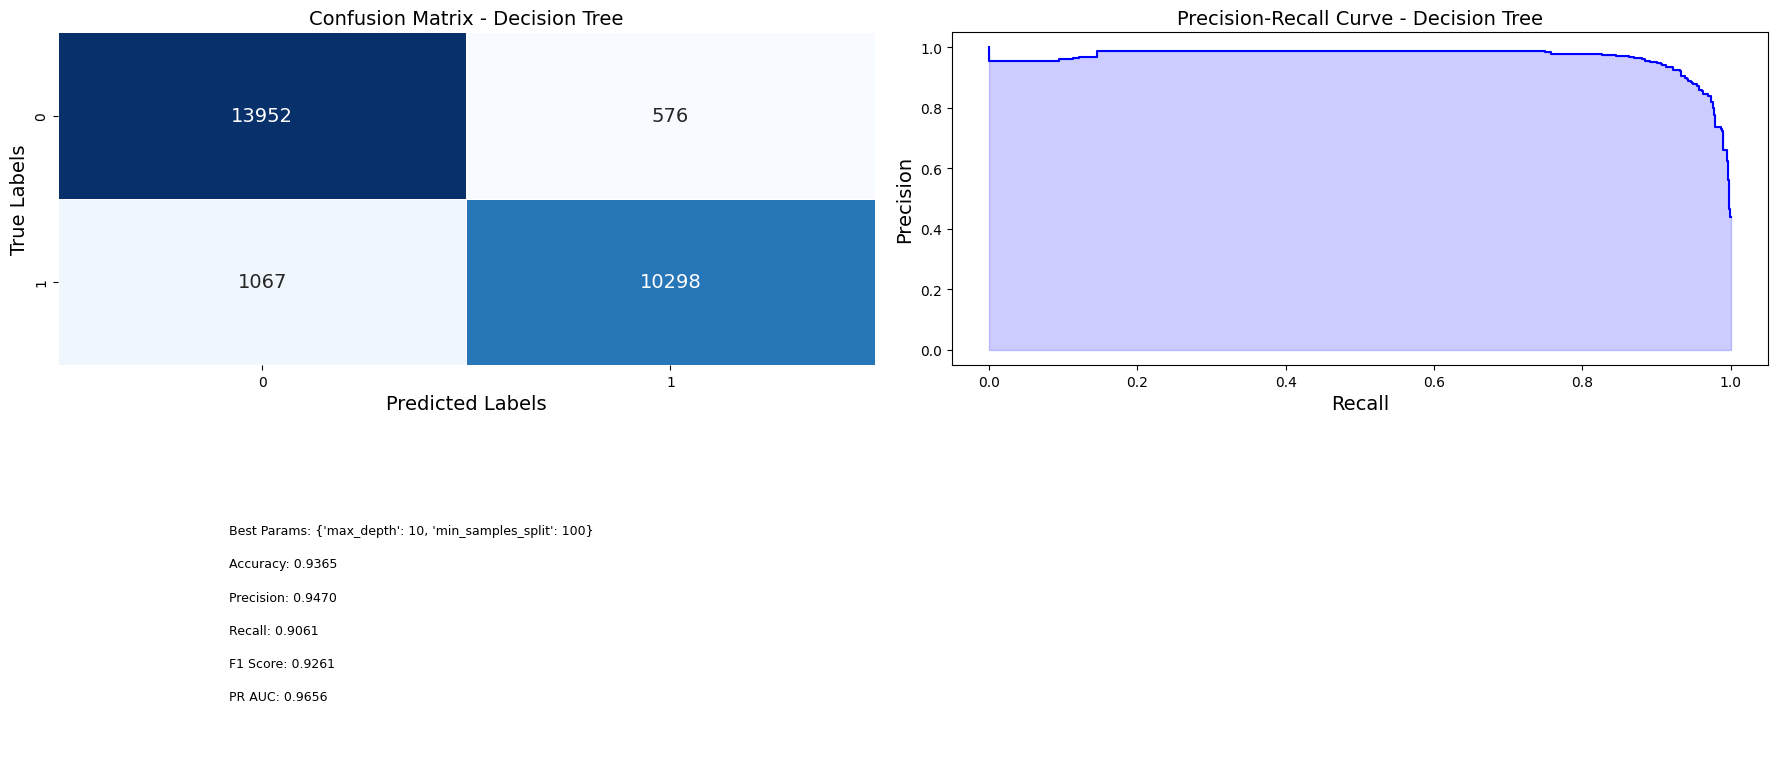

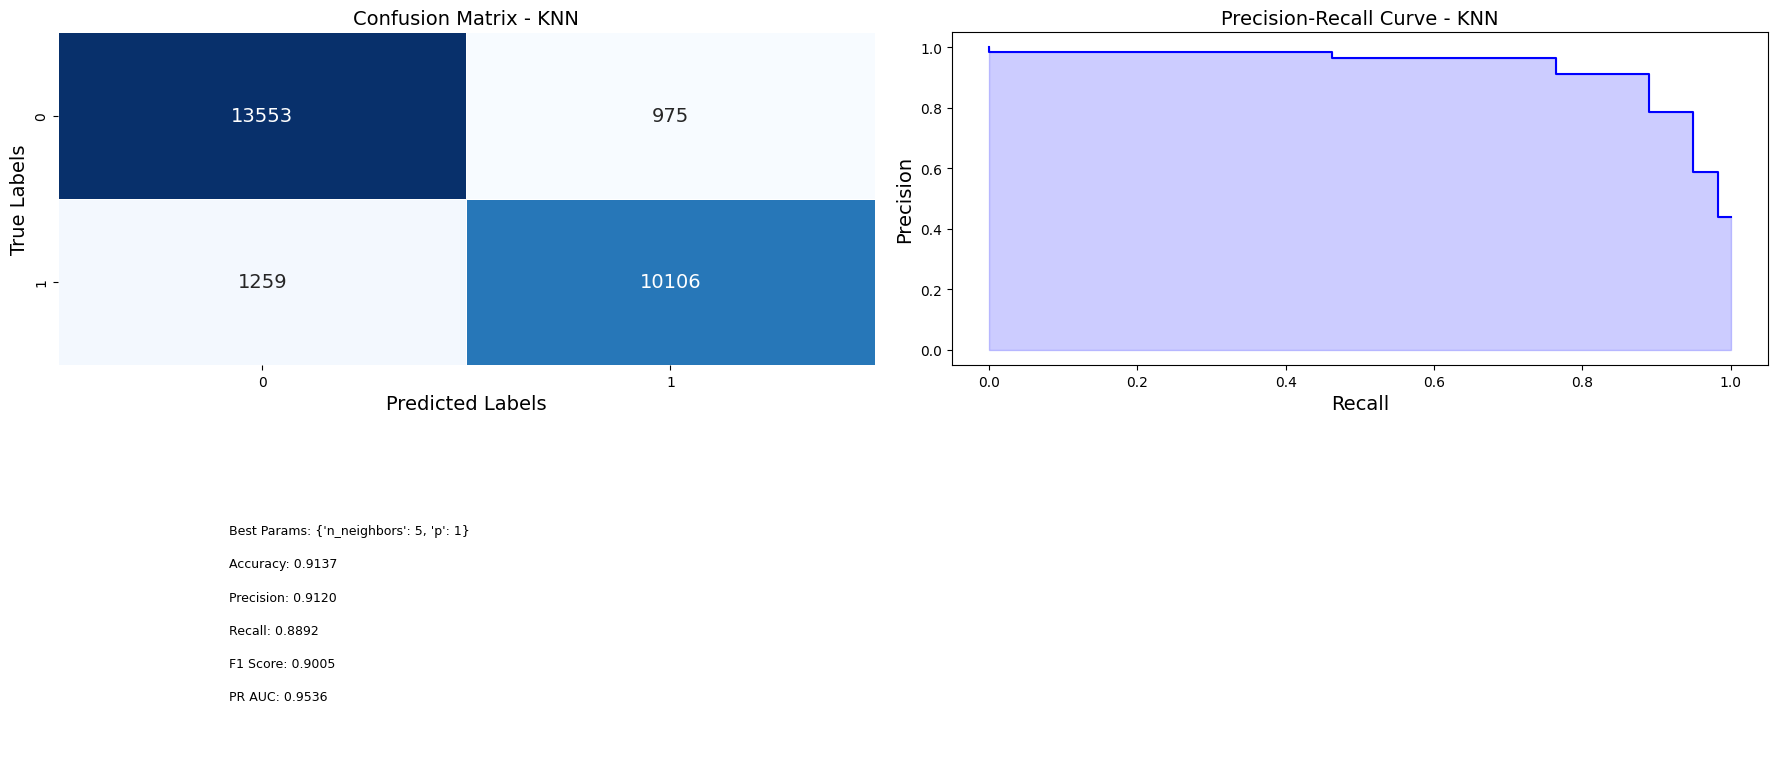

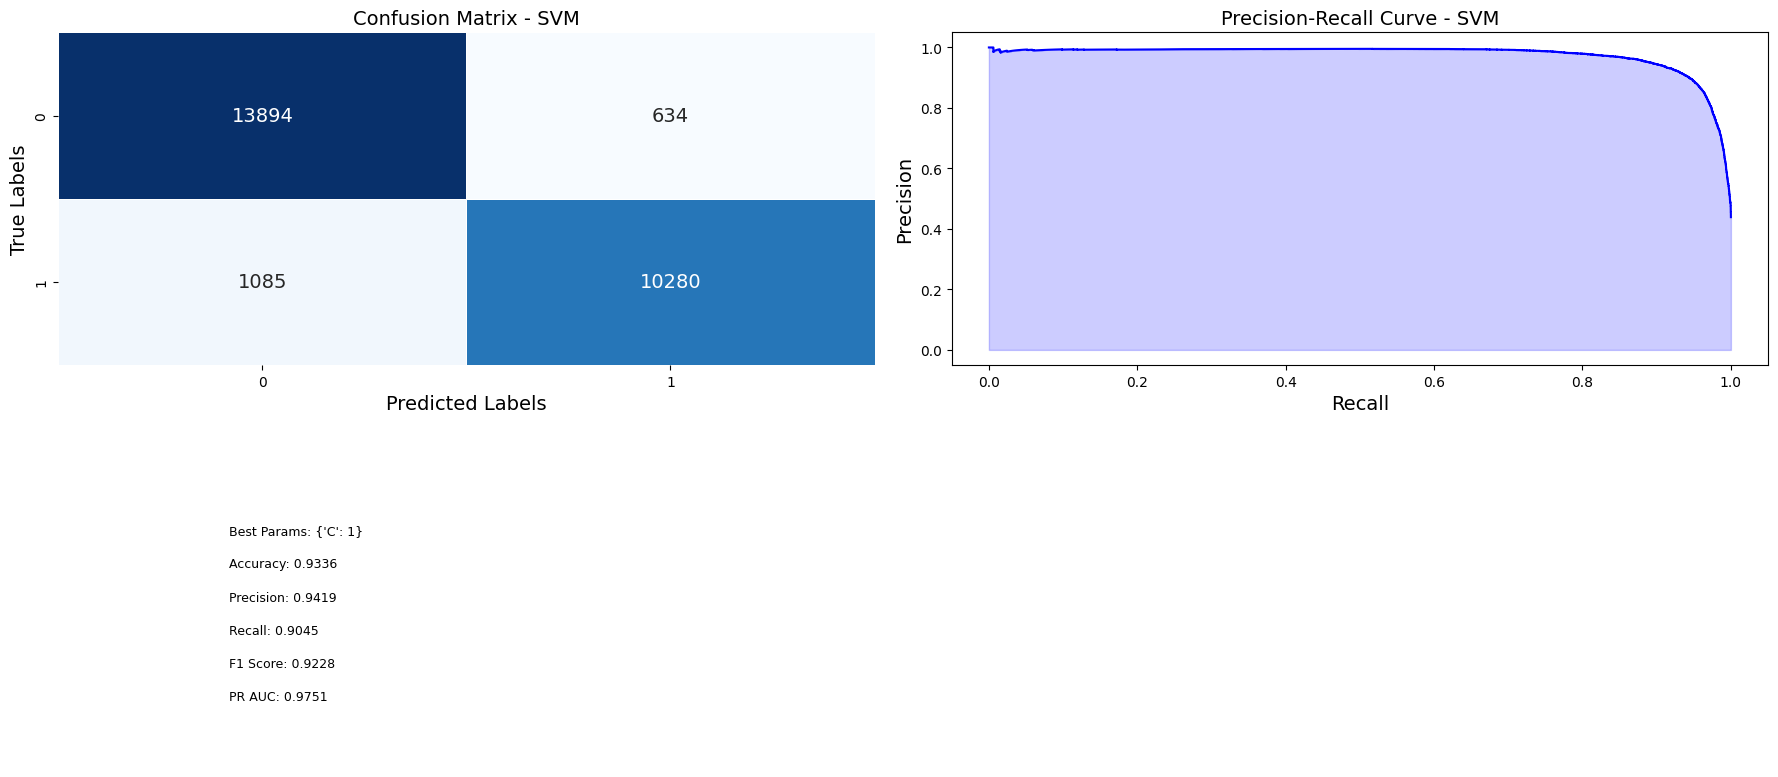

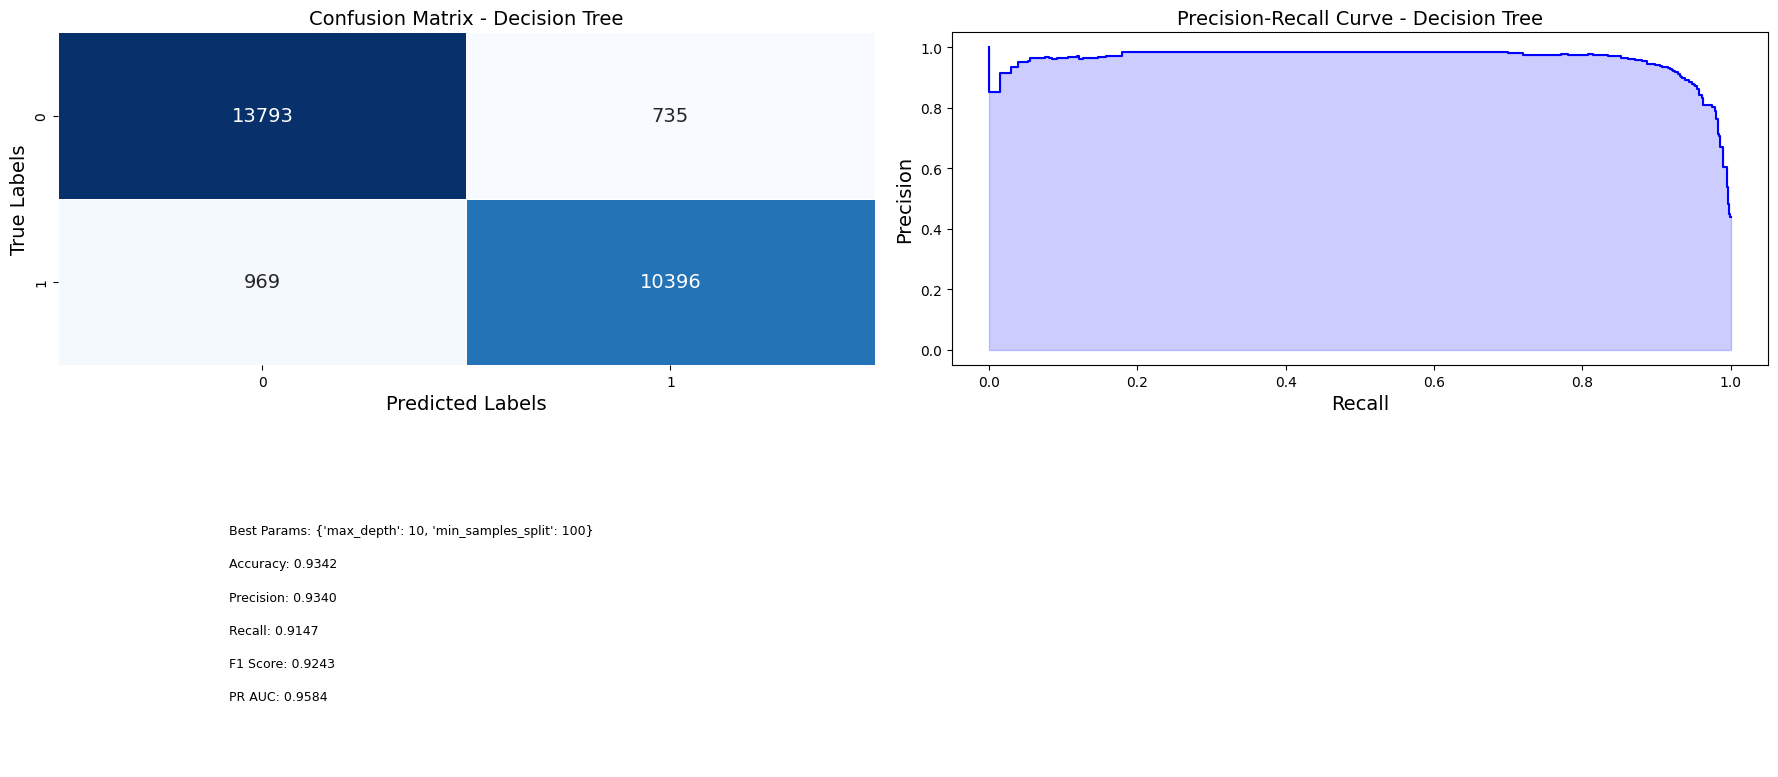

In [59]:
param_grids_1 = {
    'KNN': {
        'n_neighbors': [5],
        'p': [1],
    },
    'SVM': {
        'C': [1],
    },
    'Decision Tree': {
        'max_depth': [10],
        'min_samples_split': [100],
    }
}

train_and_evaluate(models, param_grids_1, X_train_0, y_train_1, X_test_0, y_test_0)
train_and_evaluate(models, param_grids_1, X_train_0, y_train_3, X_test_0, y_test_0)
train_and_evaluate(models, param_grids_1, X_train_0, y_train_5, X_test_0, y_test_0)
train_and_evaluate(models, param_grids_1, X_train_0, y_train_10, X_test_0, y_test_0)

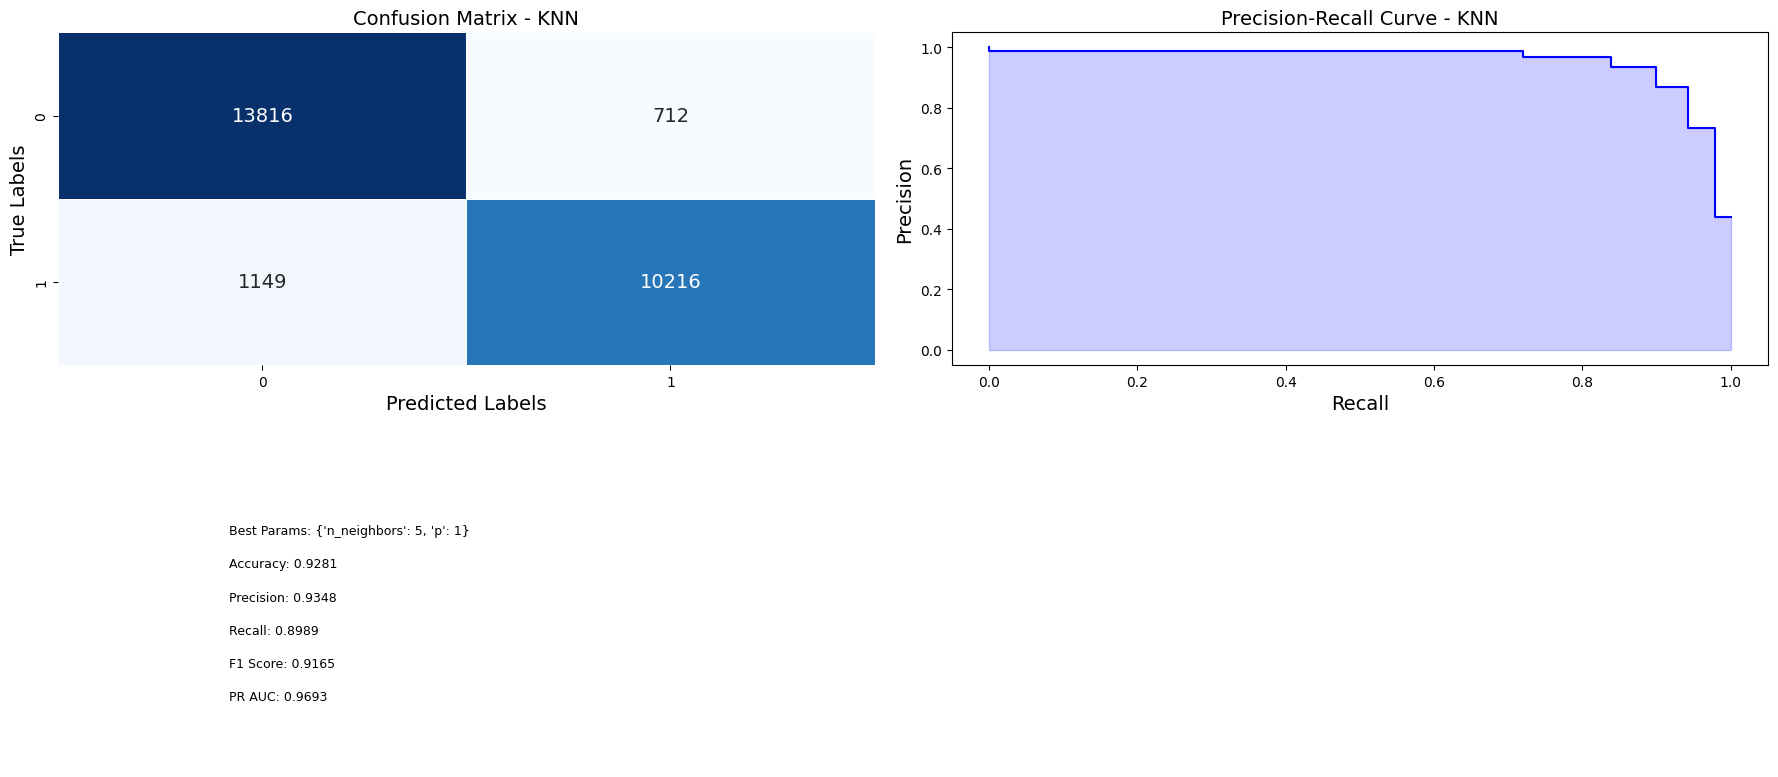

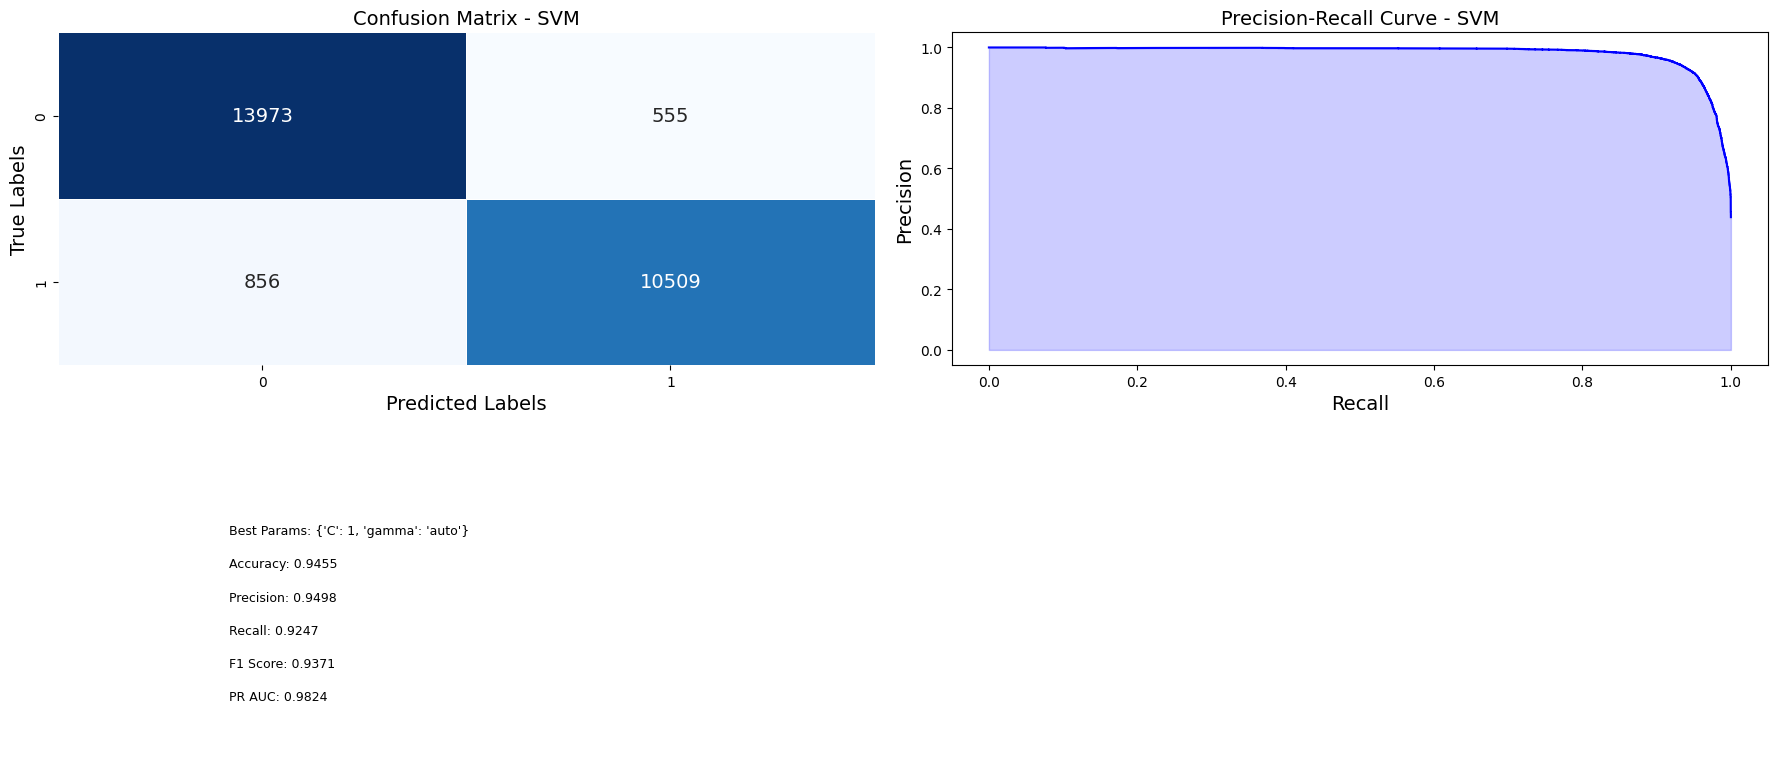

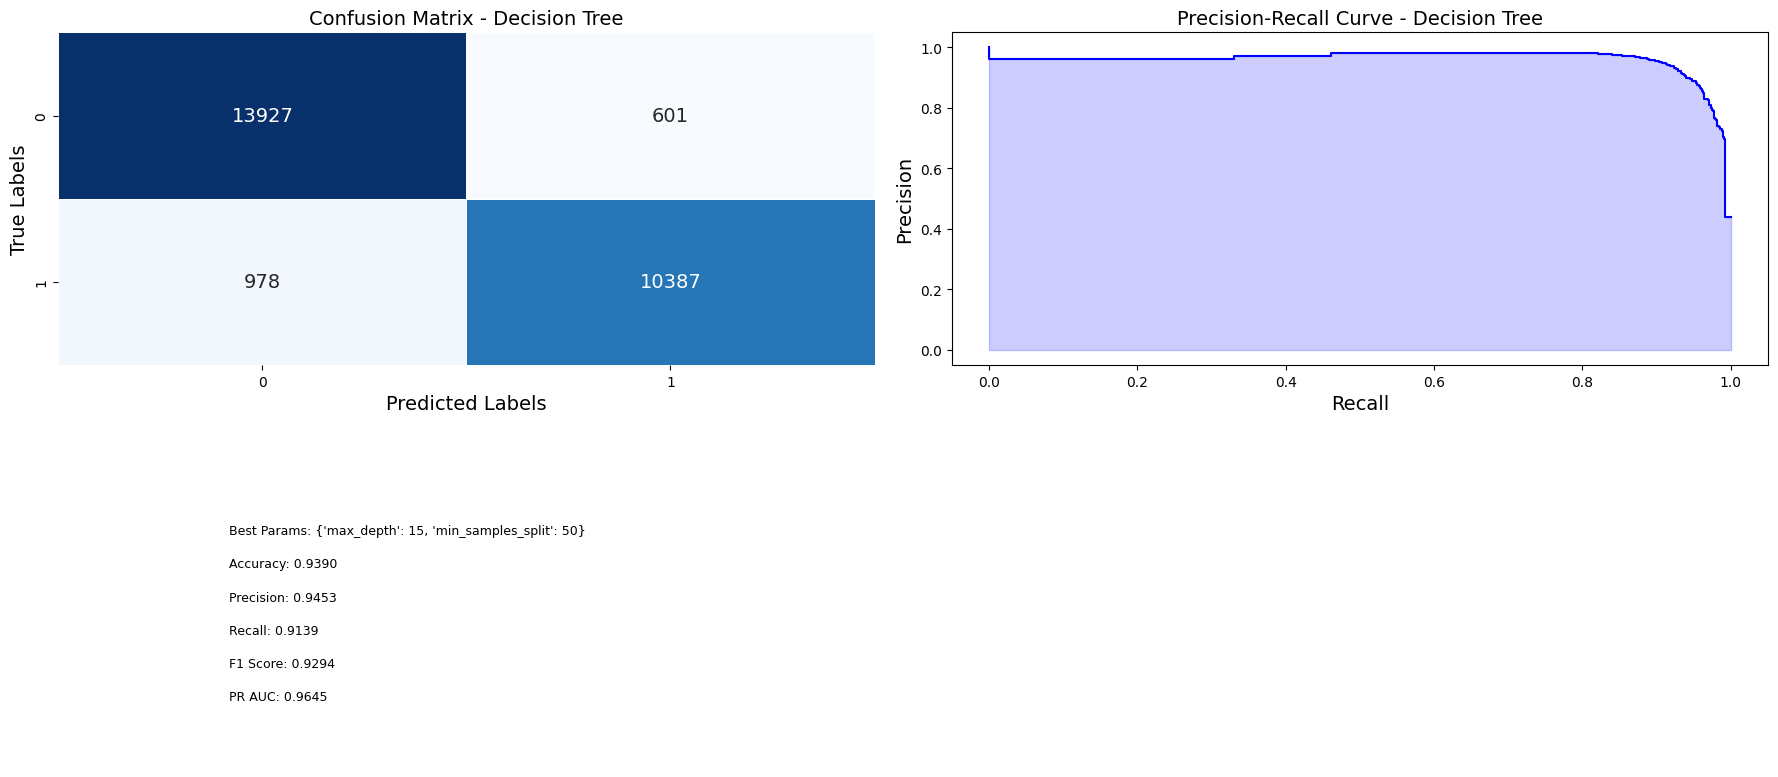

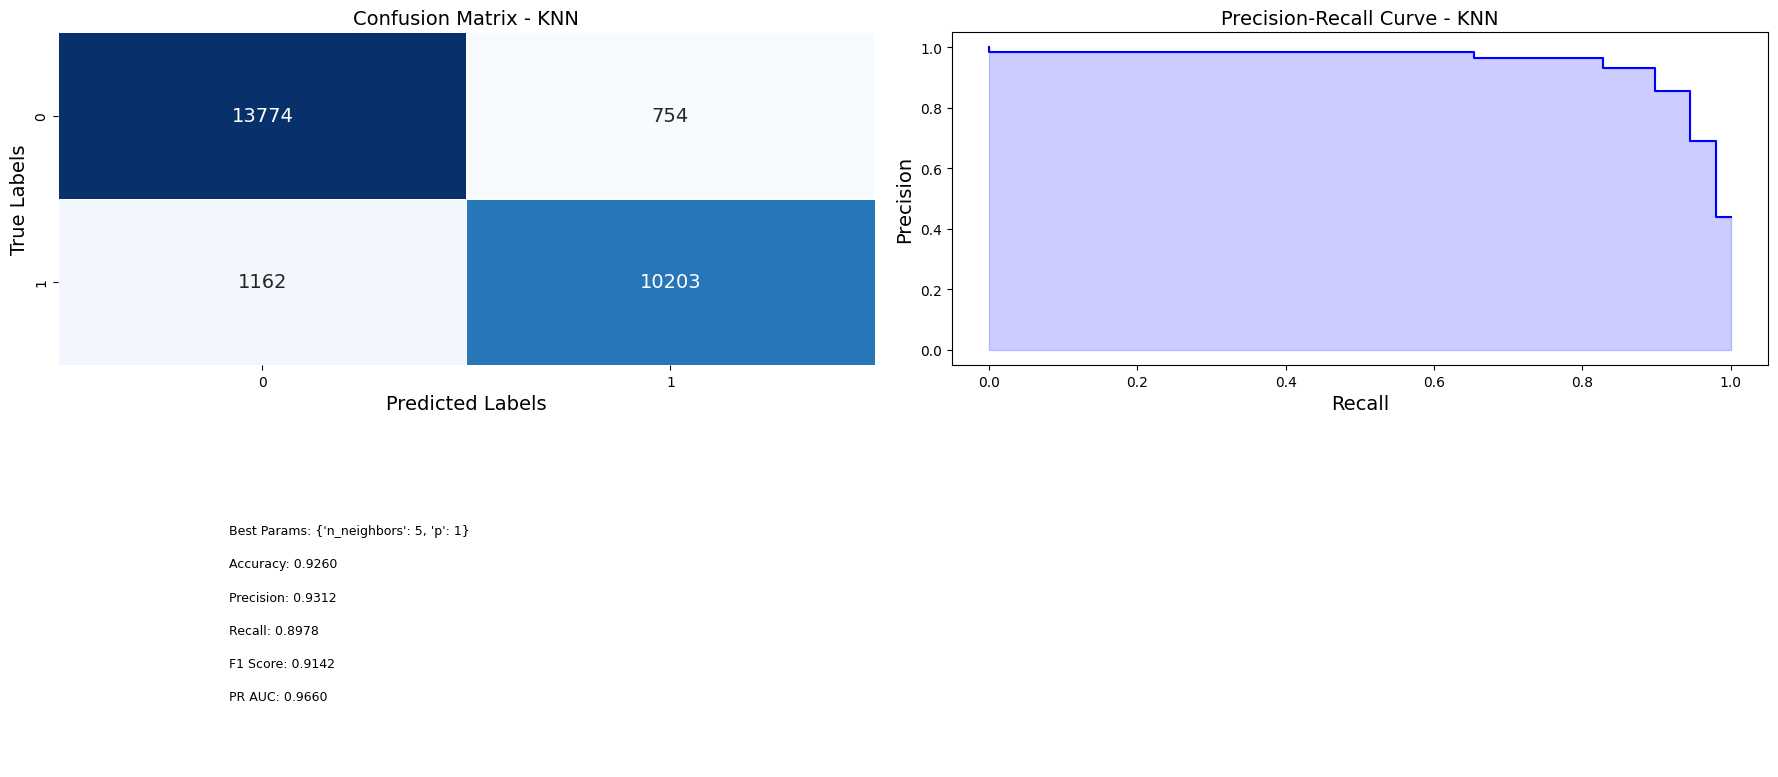

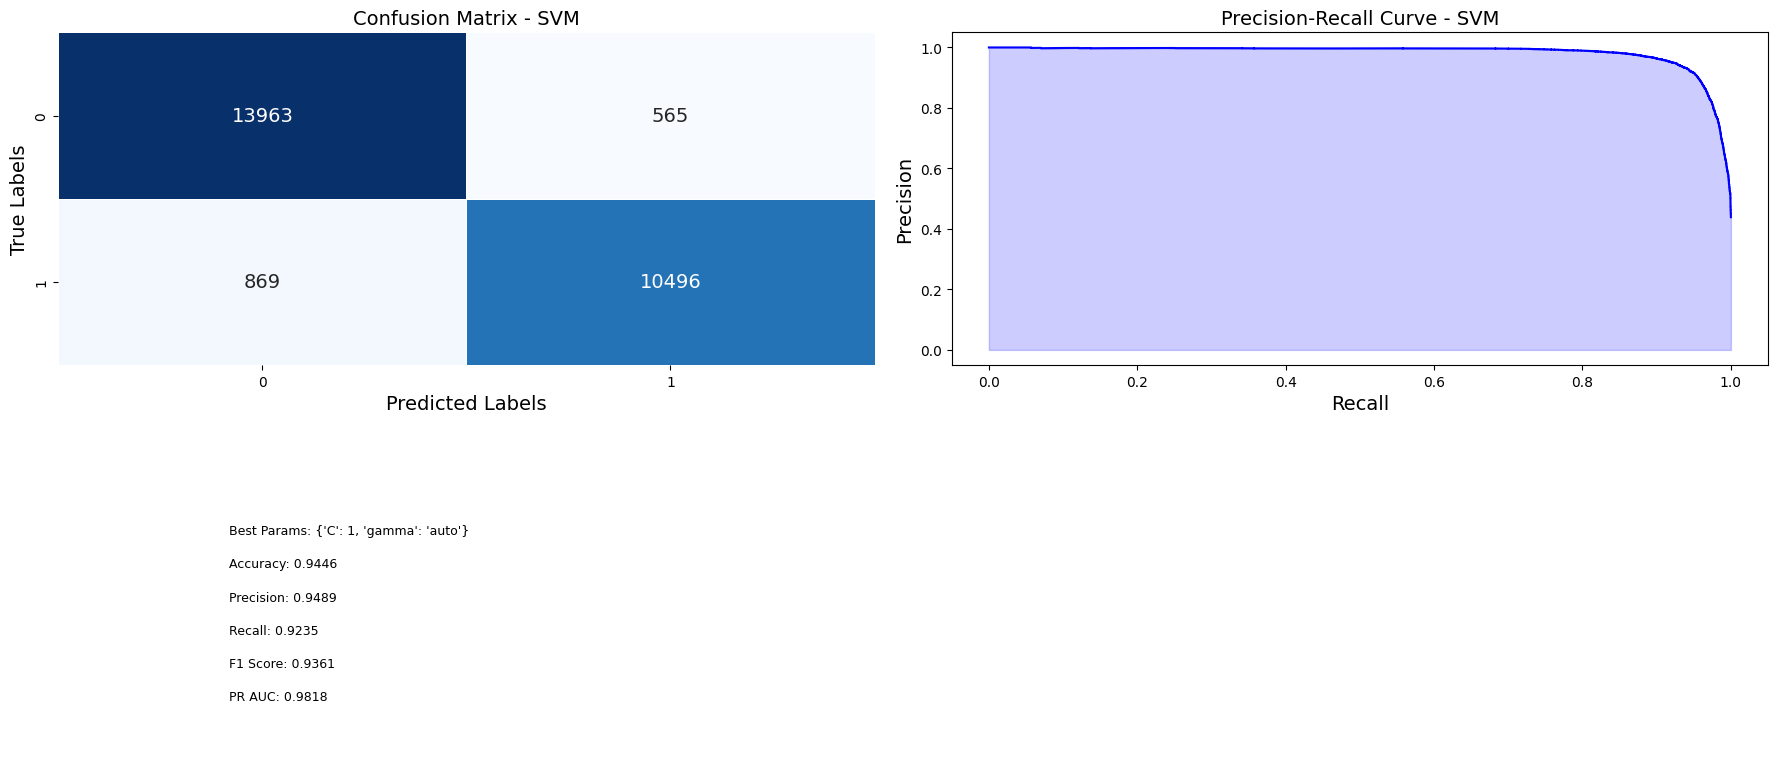

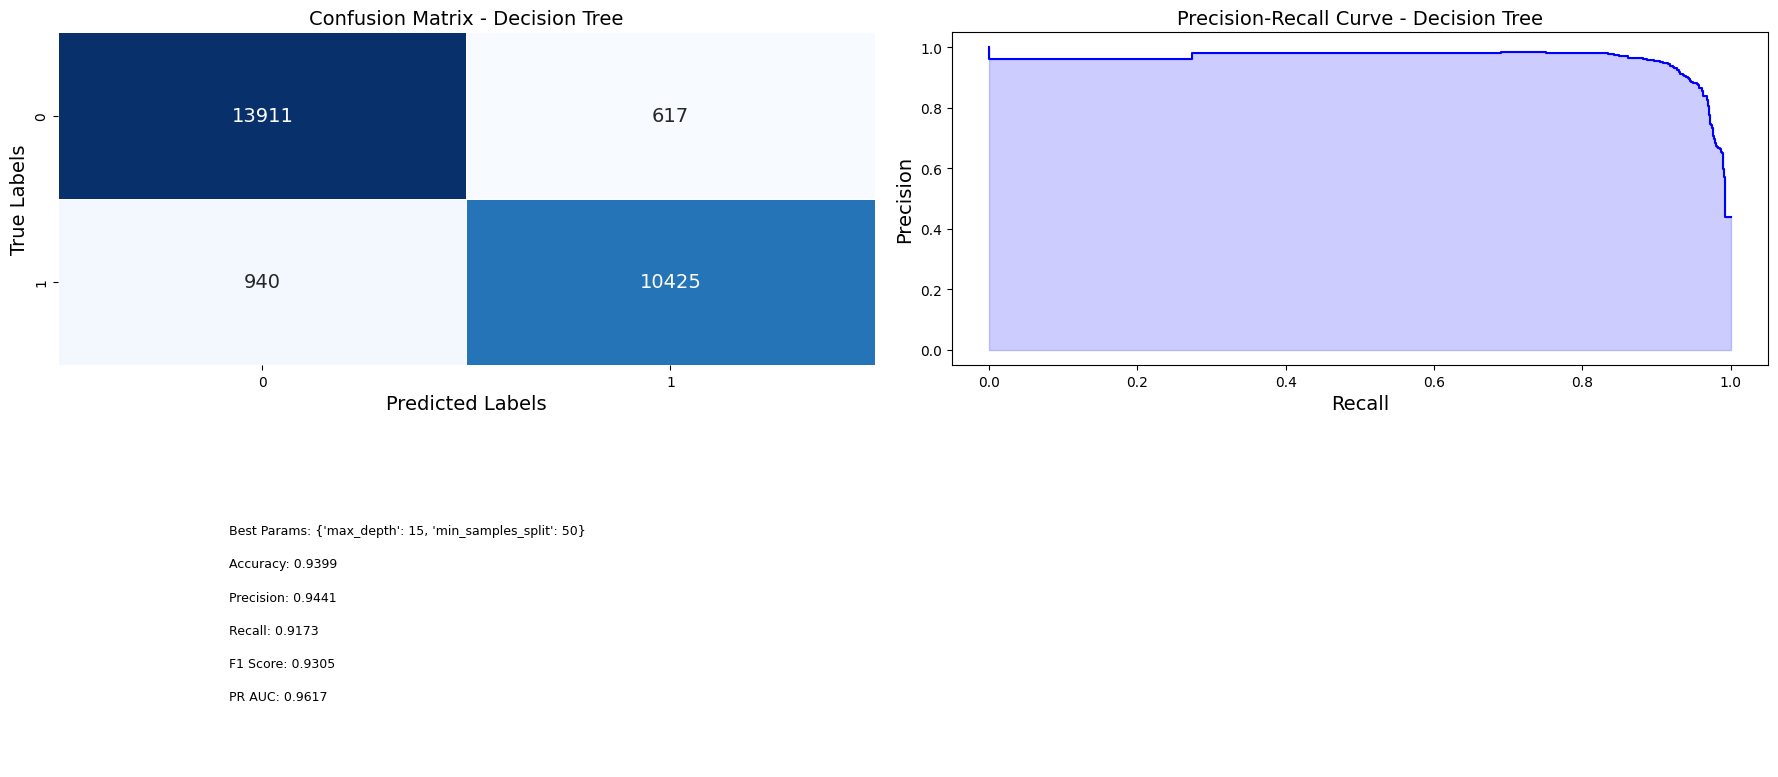

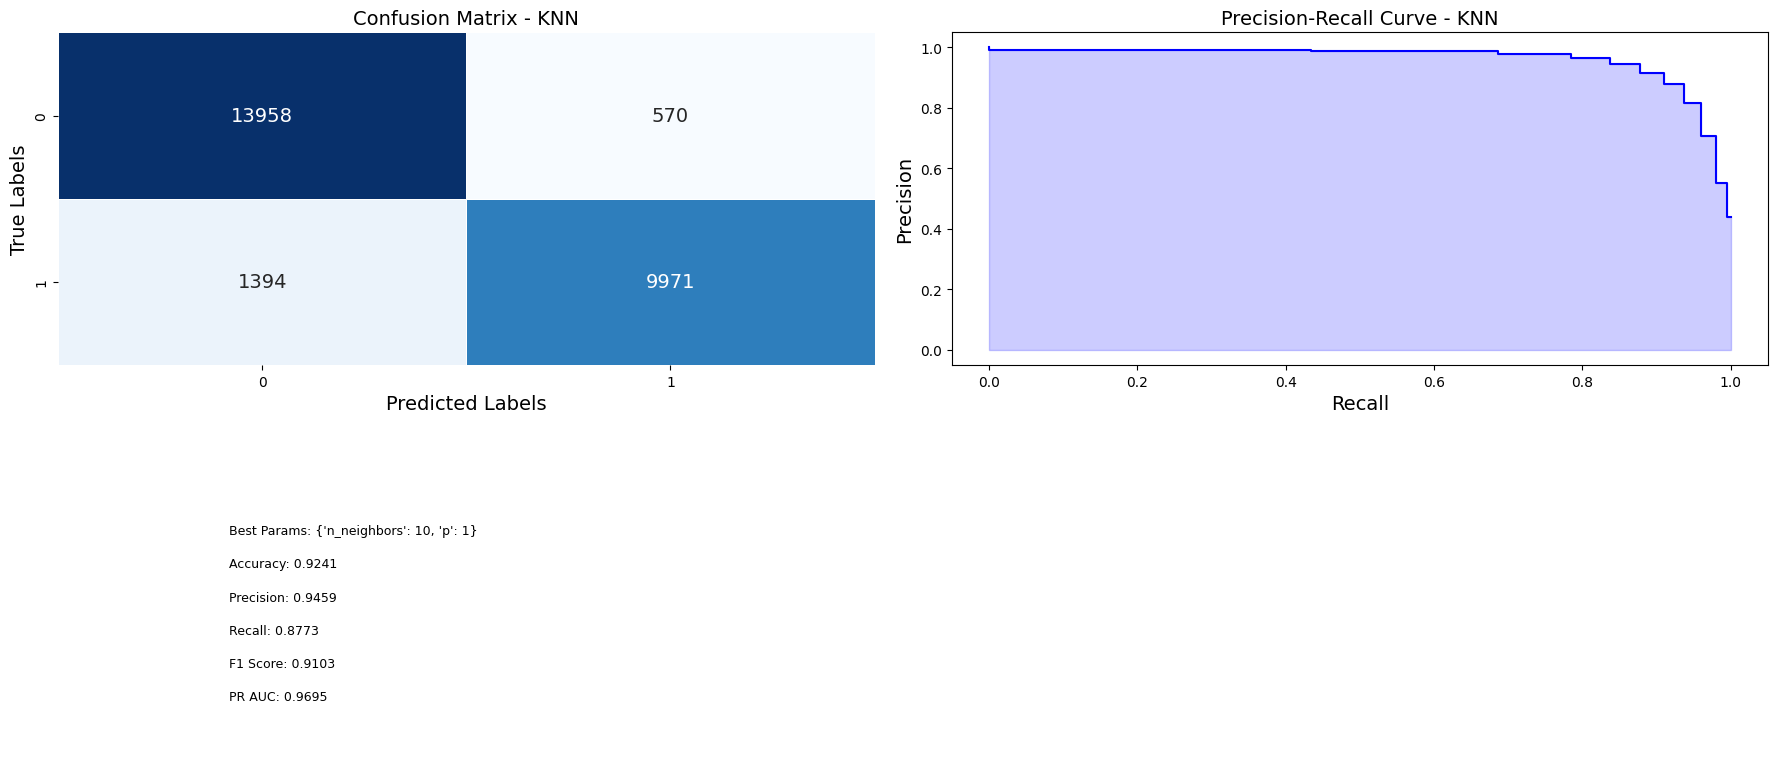

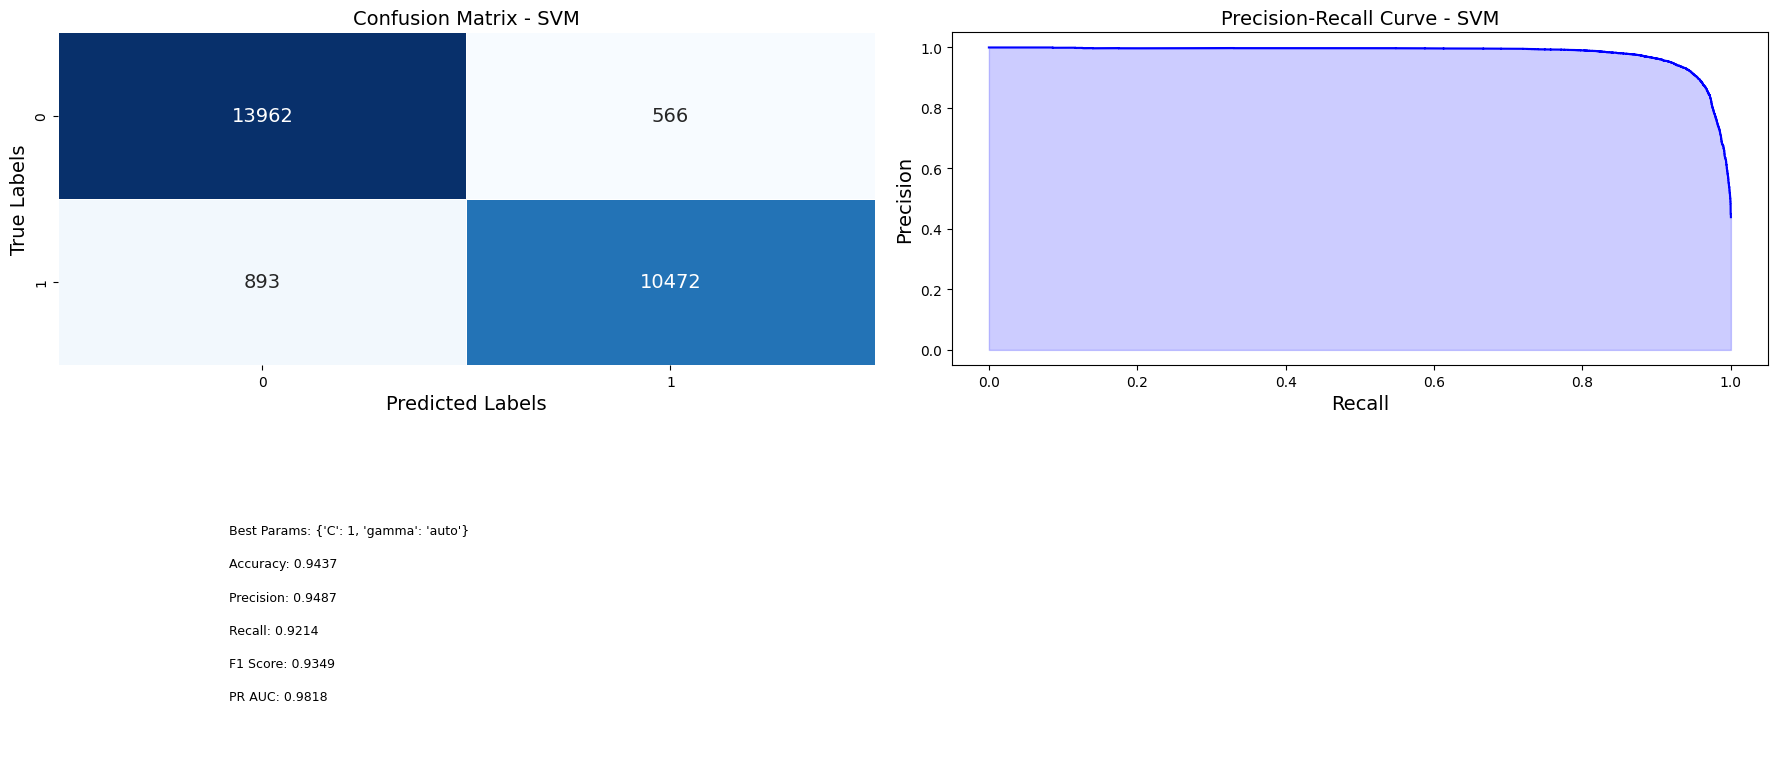

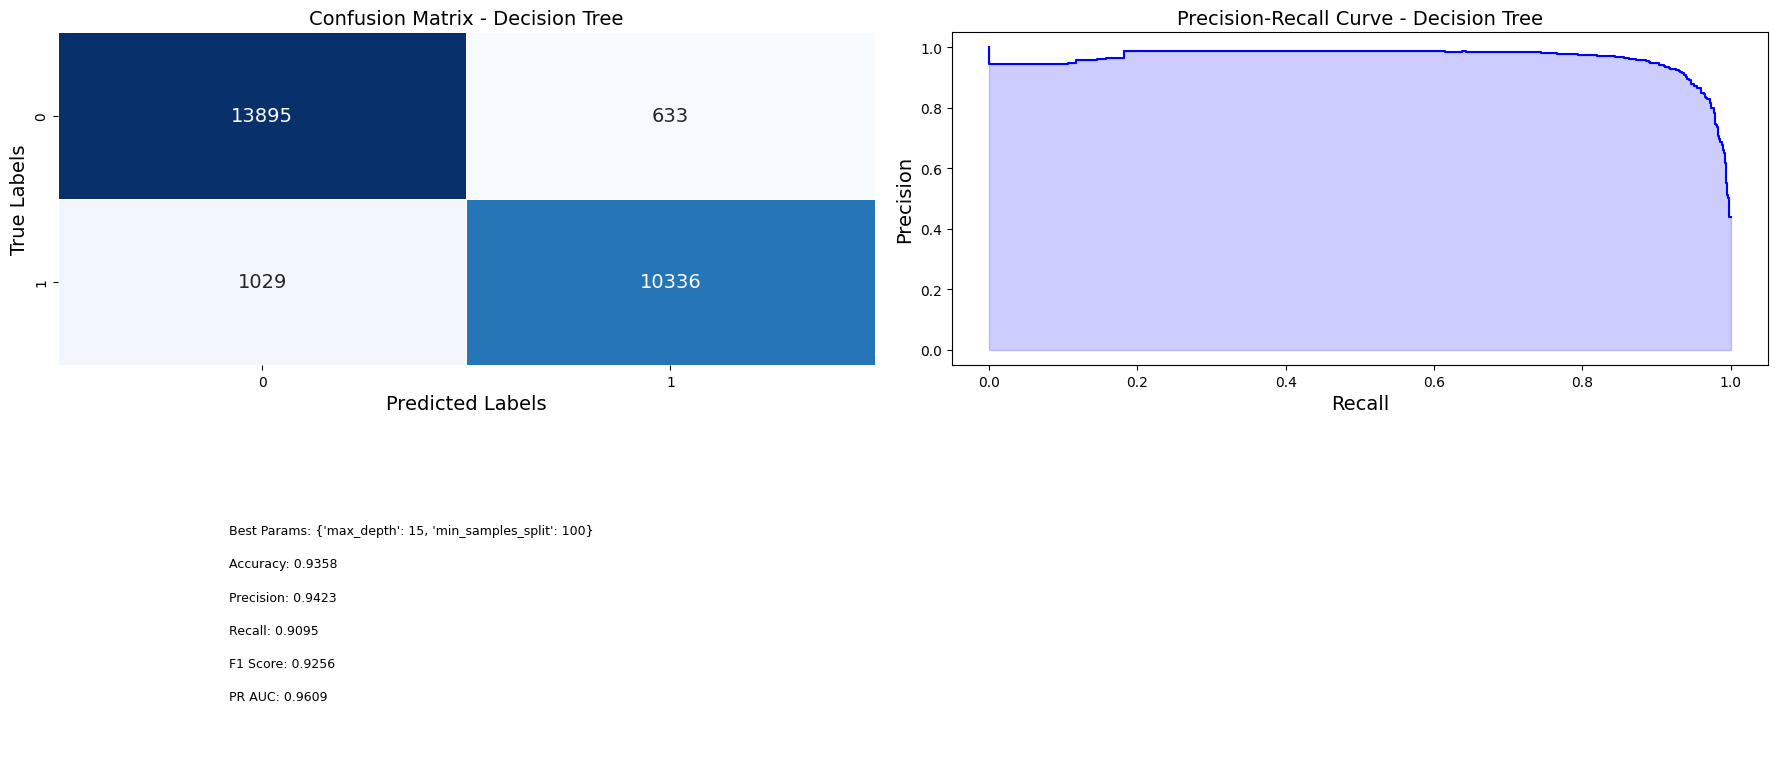

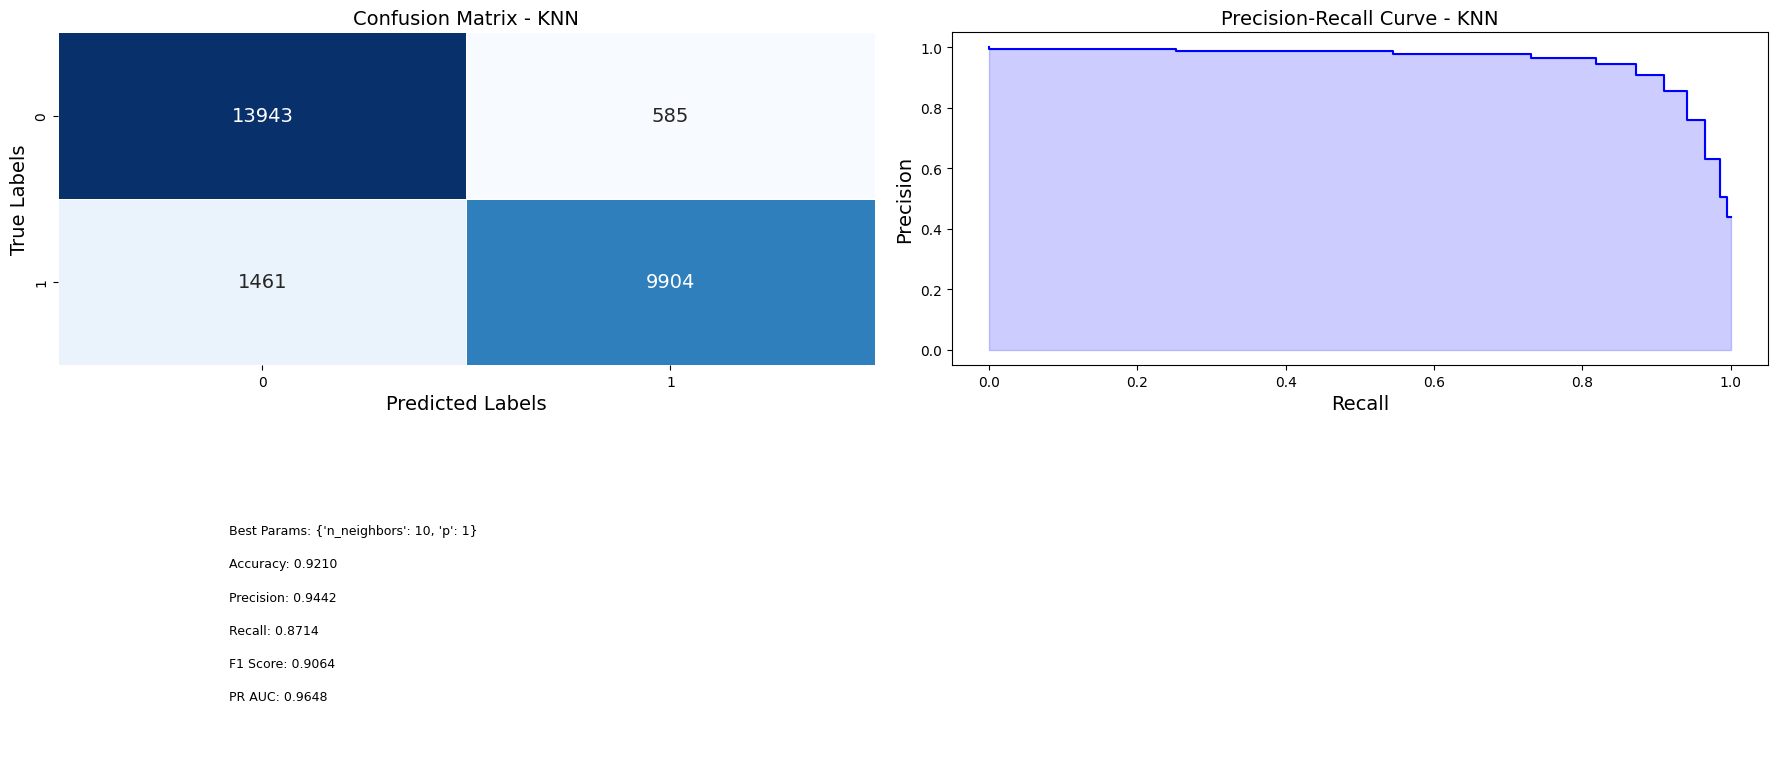

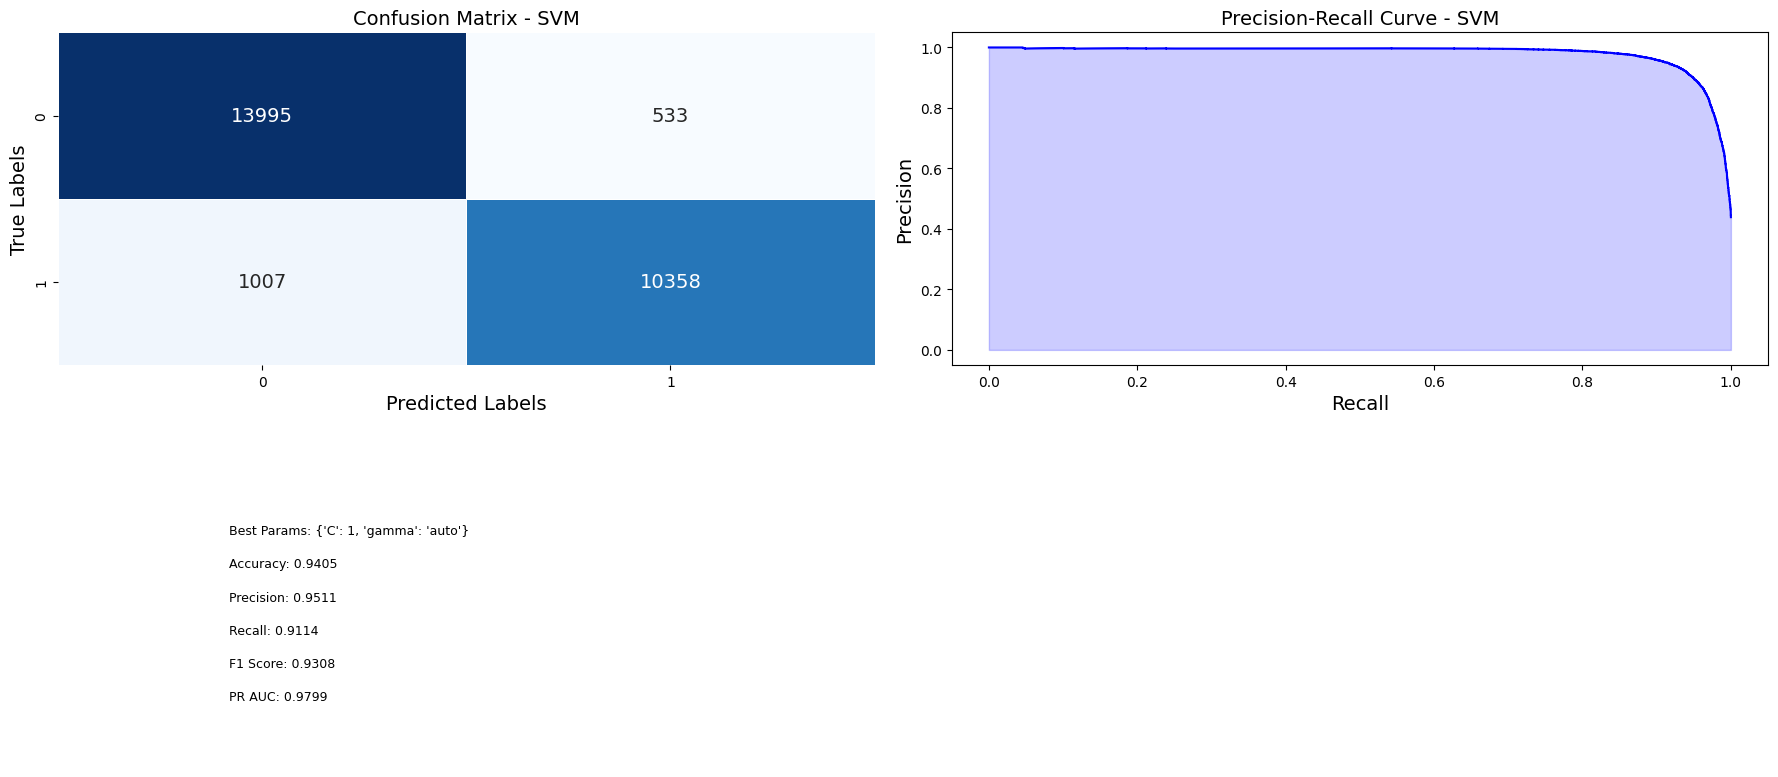

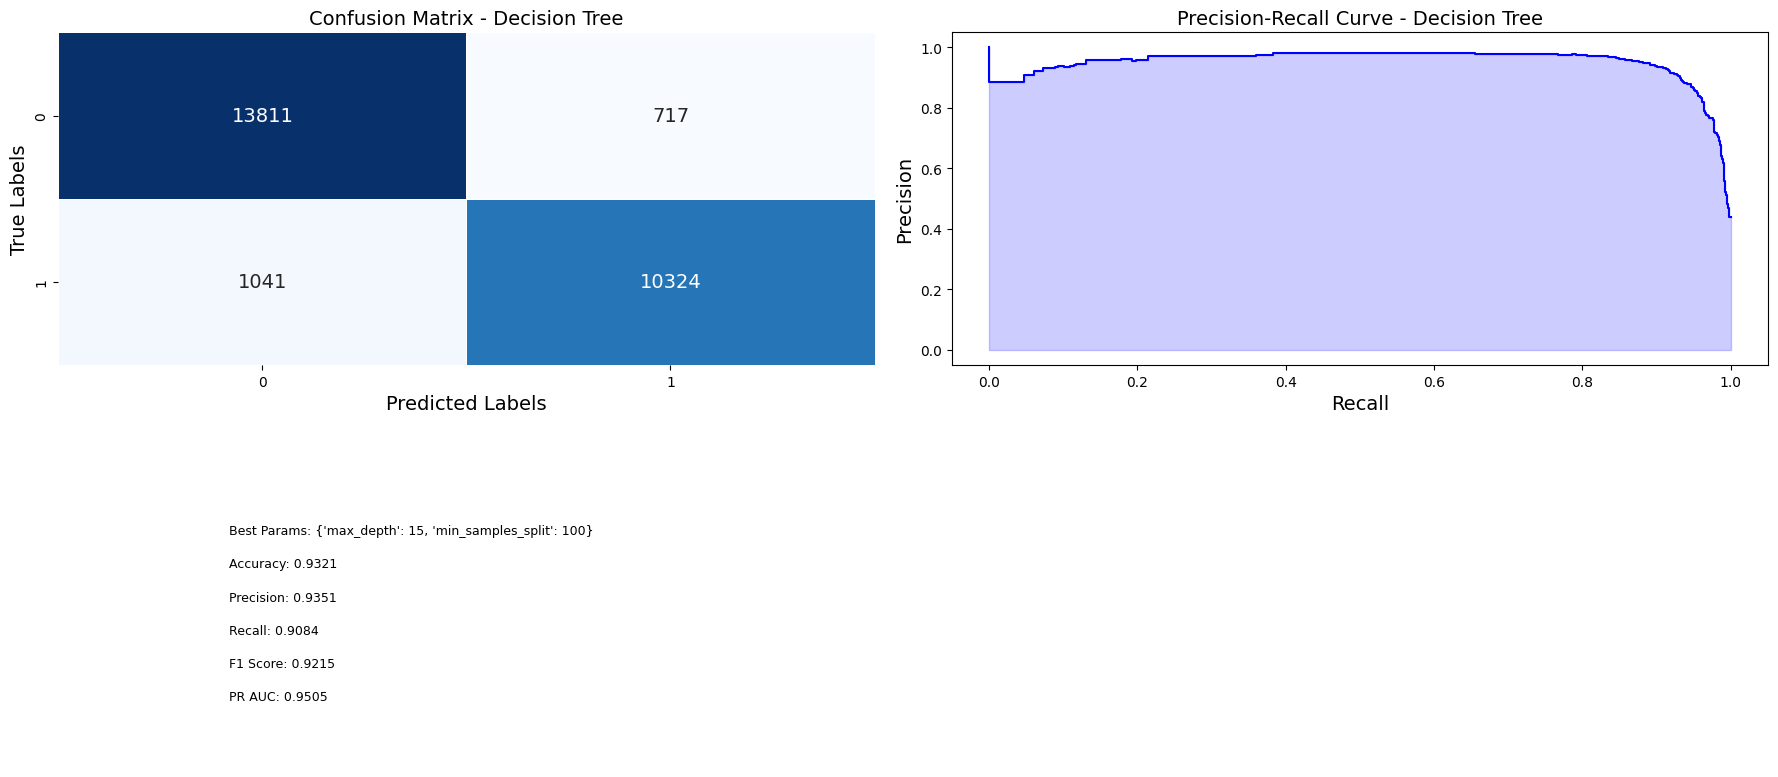

In [60]:
train_and_evaluate(models, param_grids, X_train_0, y_train_1, X_test_0, y_test_0)
train_and_evaluate(models, param_grids, X_train_0, y_train_3, X_test_0, y_test_0)
train_and_evaluate(models, param_grids, X_train_0, y_train_5, X_test_0, y_test_0)
train_and_evaluate(models, param_grids, X_train_0, y_train_10, X_test_0, y_test_0)

# 밑에 코드는 실행해보지 못함

In [ ]:
def train_and_evaluate_param(models, param_grids, X_train, y_train, X_test, y_test):
    for model_name, model in models:
        for params in ParameterGrid(param_grids[model_name]):
            model.set_params(**params)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            conf_matrix = confusion_matrix(y_test, y_pred)
            precision_curve, recall_curve, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
            pr_auc = auc(recall_curve, precision_curve)

            plt.figure(figsize=(18, 8))

            plt.subplot(2, 2, 1)
            sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False)
            plt.title(f'Confusion Matrix - {model_name} - Params: {params}')
            plt.xlabel('Predicted Labels')
            plt.ylabel('True Labels')

            plt.subplot(2, 2, 2)
            plt.step(recall_curve, precision_curve, where='post', color='b')
            plt.fill_between(recall_curve, precision_curve, step='post', alpha=0.2, color='b')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.title(f'Precision-Recall Curve - {model_name} - Params: {params}')

            plt.subplot(2, 2, (3, 4))
            plt.text(0.1, 0.7, f"Params: {params}", fontsize=9)
            plt.text(0.1, 0.6, f"Accuracy: {accuracy:.4f}", fontsize=9)
            plt.text(0.1, 0.5, f"Precision: {precision:.4f}", fontsize=9)
            plt.text(0.1, 0.4, f"Recall: {recall:.4f}", fontsize=9)
            plt.text(0.1, 0.3, f"F1 Score: {f1:.4f}", fontsize=9)
            plt.text(0.1, 0.2, f"PR AUC: {pr_auc:.4f}", fontsize=9)
            plt.axis('off')

            plt.tight_layout()
            plt.show()


In [ ]:
y_train_20 = y_train_0.copy()
num_samples = int(0.2 * len(y_train_0))
random_indices = np.random.choice(y_train_0.index, num_samples, replace=False)
y_train_20.loc[random_indices] = 1 - y_train_0.loc[random_indices]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, auc

models = [
    ('KNN', KNeighborsClassifier(n_jobs=1)),
    ('SVM', SVC(probability=True)),
    ('Decision Tree', DecisionTreeClassifier())
]

param_grids_max = {
    'KNN': {
        'n_neighbors': [5, 10, 20, 50, 100],
        'p': [1, 2],
    },
    'SVM': {
        'C': [0.1, 1],
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'linear']
    },
    'Decision Tree': {
        'max_depth': [3, 5, 10, 15],
        'min_samples_split': [10, 30, 50, 100, 300, 500, 1000],
    }
}

train_and_evaluate_param(models, param_grids_max, X_train_0, y_train_0, X_test_0, y_test_0)
train_and_evaluate_param(models, param_grids_max, X_train_0, y_train_1, X_test_0, y_test_0)
train_and_evaluate_param(models, param_grids_max, X_train_0, y_train_3, X_test_0, y_test_0)
train_and_evaluate_param(models, param_grids_max, X_train_0, y_train_5, X_test_0, y_test_0)
train_and_evaluate_param(models, param_grids_max, X_train_0, y_train_10, X_test_0, y_test_0)
train_and_evaluate_param(models, param_grids_max, X_train_0, y_train_20, X_test_0, y_test_0)

In [ ]:
error_rates = [0, 1, 3, 5, 10]

accuracy_knn = [0.929, 0.928, 0.926, 0.924, 0.913]
accuracy_svm = [0.946, 0.945, 0.944, 0.943, 0.940]
accuracy_tree = [0.939, 0.939, 0.938, 0.936, 0.934]

plt.figure(figsize=(10, 6))

plt.plot(error_rates, accuracy_knn, marker='o', label='KNN')
plt.plot(error_rates, accuracy_svm, marker='s', label='SVM')
plt.plot(error_rates, accuracy_tree, marker='^', label='Tree')

plt.xlabel('Error Rate (%)')
plt.ylabel('Accuracy')
plt.ylim(0.91, 0.95)
plt.title('Accuracy vs Error Rate for Different Algorithms')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
error_rates = [0, 1, 3, 5, 10]

accuracy_knn = [0.929, 0.928, 0.926, 0.924, 0.921]
accuracy_svm = [0.946, 0.945, 0.944, 0.943, 0.940]
accuracy_tree = [0.939, 0.939, 0.939, 0.936, 0.934]

plt.figure(figsize=(10, 6))

plt.plot(error_rates, accuracy_knn, marker='o', label='KNN')
plt.plot(error_rates, accuracy_svm, marker='s', label='SVM')
plt.plot(error_rates, accuracy_tree, marker='^', label='Tree')

plt.xlabel('Error Rate (%)')
plt.ylabel('Accuracy')
plt.ylim(0.91, 0.95)
plt.title('Accuracy vs Error Rate for Different Algorithms')
plt.legend()
plt.grid(True)
plt.show()